<a href="https://colab.research.google.com/github/shamabansal17/Case-studies/blob/main/WALMART.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSVoaT0G9r66AiySOe_PYyr_2KQygqhm0MnYA&usqp=CAU)



# *WALMART CASE STUDY*
Analysed by:SHAMA BANSAL

Linked to this Colab notebook
https://colab.research.google.com/drive/16Ao-gxEdD0XLS7odfB-12bTR8DbShaaI#scrollTo=UN61PFxsxgV3

Walmart is an American multinational retail corporation that operates a chain of supercenters, discount departmental stores, and grocery stores from the United States. Walmart has more than 100 million customers worldwide.

# *PROBLEM STATEMENT*
The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men etc.

In [ ]:
# @title *Importing necessary Libraries*
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# @title *Importing and reading Dataset*

!gdown 1i1YC0XI1qV3hR75Z3E3cufD_O3wbhSLX

Downloading...
From: https://drive.google.com/uc?id=1i1YC0XI1qV3hR75Z3E3cufD_O3wbhSLX
To: /content/walmart_data.csv
100% 23.0M/23.0M [00:00<00:00, 163MB/s]


In [ ]:
walmart_df=pd.read_csv('walmart_data.csv')


# *EXPLORATORY DATA ANALYSIS*

In [ ]:
# @title *Checking Structure of data*
walmart_df.shape

(550068, 10)

In [ ]:
# Reading first few datapoints
walmart_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [ ]:
# checking characteristics of data,its types and count of column etc
walmart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [ ]:
# Checking unique values in each column
walmart_df.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category                 20
Purchase                      18105
dtype: int64

- The data frame has 550068 rows and 10 cloumns.
- There are 5 columns with int datatype and 5 with object datatype.
- A close look on data tells that out of 10, 9 features are categorial kind of, but User_ID and Product_ID count are high so except them all other can be coverted to categorial to save memory space.
- Only 1 continuous numerical column is there, i.e.,  purchase.

In [ ]:
# Checking memory usage before datatype conversion
walmart_df.memory_usage()

Index                             128
User_ID                       4400544
Product_ID                    4400544
Gender                        4400544
Age                           4400544
Occupation                    4400544
City_Category                 4400544
Stay_In_Current_City_Years    4400544
Marital_Status                4400544
Product_Category              4400544
Purchase                      4400544
dtype: int64

In [ ]:
# converting data types of various columns to category
walmart_df[['Gender','Age','Occupation','City_Category','Stay_In_Current_City_Years','Marital_Status','Product_Category']]=\
walmart_df[['Gender','Age','Occupation','City_Category','Stay_In_Current_City_Years','Marital_Status','Product_Category']].astype('category')

In [ ]:
# Checking memory usage after datatype conversion
walmart_df.memory_usage()


Index                             128
User_ID                       4400544
Product_ID                    4400544
Gender                         550192
Age                            550424
Occupation                     550792
City_Category                  550200
Stay_In_Current_City_Years     550280
Marital_Status                 550192
Product_Category               550784
Purchase                      4400544
dtype: int64

In [ ]:
# checking data types again after coversion
walmart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  int64   
 1   Product_ID                  550068 non-null  object  
 2   Gender                      550068 non-null  category
 3   Age                         550068 non-null  category
 4   Occupation                  550068 non-null  category
 5   City_Category               550068 non-null  category
 6   Stay_In_Current_City_Years  550068 non-null  category
 7   Marital_Status              550068 non-null  category
 8   Product_Category            550068 non-null  category
 9   Purchase                    550068 non-null  int64   
dtypes: category(7), int64(2), object(1)
memory usage: 16.3+ MB


We can see the data was taking 42 MB space earlier which is now reduced to 16.3 MB only.

In [ ]:
# @title *Checking Missing Values*
walmart_df.isnull().sum()


User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [ ]:
# @title *Checking Duplicate Values*
walmart_df[walmart_df.duplicated()]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase


There is no missing or duplicate values in the dataset.

# *Statistical Summary*

In [ ]:
# Checking statistical data for int datatype columns
walmart_df.describe()

,User_ID,Purchase
count,5.500680e+05,550068.000000
mean,1.003029e+06,9263.968713
std,1.727592e+03,5023.065394
min,1.000001e+06,12.000000
25%,1.001516e+06,5823.000000
50%,1.003077e+06,8047.000000
75%,1.004478e+06,12054.000000
max,1.006040e+06,23961.000000


In [ ]:
# Checking statistical data for object datatype columns
walmart_df.describe(include=object)


,Product_ID
count,550068
unique,3631
top,P00265242
freq,1880


In [ ]:
# Checking statistical data for category datatype columns
walmart_df.describe(include='category')

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category
count,550068,550068,550068,550068,550068,550068,550068
unique,2,7,21,3,5,2,20
top,M,26-35,4,B,1,0,5
freq,414259,219587,72308,231173,193821,324731,150933


- We can see the min purchase amount is 12 and maximum is 23961.
- The average purchase amount is 9263 and standar deviation is too high 5023.
- The difference of approx. 1200 between mean amd median value hints towards presence of outliers.
- The product ID P00265242 is sold most number of times(1880).
- Males made more purchases than Females.
- Age category 26-35 buys more number of times as compared to others.
- The customer having 4 occupation are buying most.
- The customer from City B are buying most.
- Those who are staying in city for 1 year are frequesnt customers
- Unmarried people buys more from Walmart.
- Product_Category % is sold most number of times.

# *UNIVARIATE ANALYSIS*

In [ ]:
# @title *USER ID*
walmart_df['User_ID'].value_counts()

1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
           ... 
1002690       7
1002111       7
1005810       7
1004991       7
1000708       6
Name: User_ID, Length: 5891, dtype: int64

In [ ]:
# Finding count of unique users
user_df=walmart_df['User_ID'].value_counts().sort_values(ascending=False).head(10)
# Finding pruchases sum by each user
user_pur_df=walmart_df.groupby(['User_ID'])['Purchase'].sum().sort_values(ascending=False).head(10)
print("User Id with Count of purchases\n",user_df,"\n\nUser ID with amount of purchases\n",user_pur_df)

User Id with Count of purchases
 1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
1003618     767
1001150     752
1001015     740
1005795     729
1005831     727
Name: User_ID, dtype: int64 

User ID with amount of purchases
 User_ID
1004277    10536909
1001680     8699596
1002909     7577756
1001941     6817493
1000424     6573609
1004448     6566245
1005831     6512433
1001015     6511314
1003391     6477160
1001181     6387961
Name: Purchase, dtype: int64


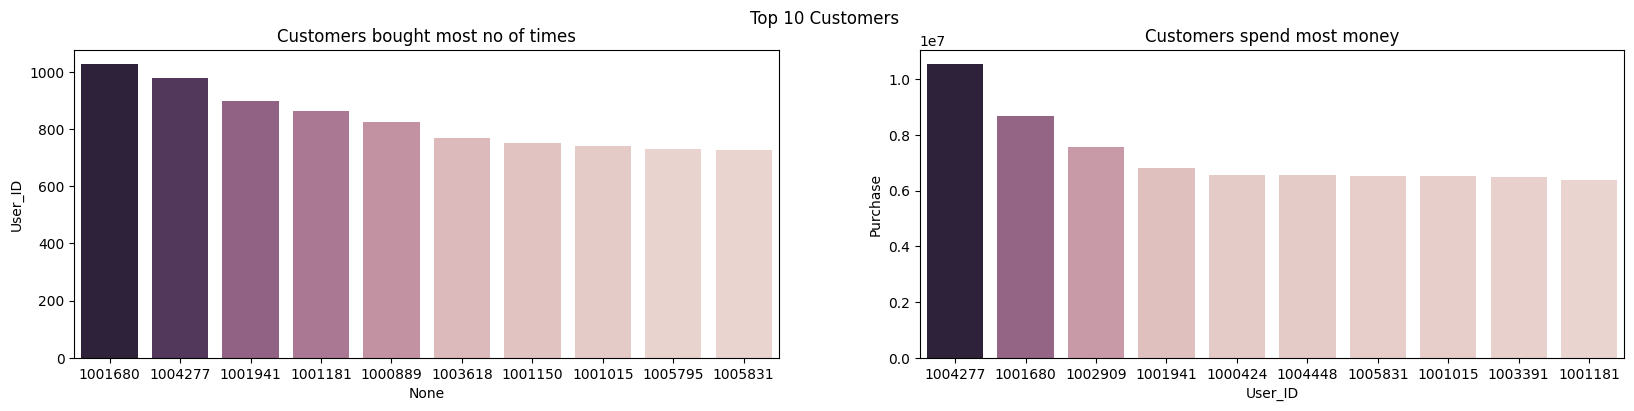

In [ ]:
# graphical analysis
plt.figure(figsize=(20,4))
plt.suptitle("Top 10 Customers")
plt.subplot(1,2,1)
sns.barplot(x=user_df.index,y=user_df,hue=user_df,legend=False,order=user_df.index)
plt.title("Customers bought most no of times")

plt.subplot(1,2,2)
sns.barplot(x=user_pur_df.index,y=user_pur_df,hue=user_pur_df,legend=False,order=user_pur_df.index)
plt.title("Customers spend most money")


plt.show()


- There are 5891 unique customers,some who made the purchases as many as 1026 times and some who made purchases for 6-7 times only.
- User_id 1001680 has made purchases maximum number of time followed by 1004277 and 1001941.
- User_id 1004277 bought products for maximum amount 10.5 billion followed by 1001680 and 1002909for 8.6 and 7.5 billion respectively.

In [ ]:
# @title *PRODUCT ID*
walmart_df['Product_ID'].value_counts()


P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00314842       1
P00298842       1
P00231642       1
P00204442       1
P00066342       1
Name: Product_ID, Length: 3631, dtype: int64

In [ ]:
# the most sold products
top_10_prdct=walmart_df.groupby('Product_ID')['User_ID'].nunique().sort_values(ascending=False).head(10)
# the most revenue earning products
top_10_prdct_pur=walmart_df.groupby("Product_ID")['Purchase'].sum().sort_values(ascending=False).head(10)
print("Product ID with number of times sold\n",top_10_prdct,"\n\nProduct ID with amount received by selling\n",top_10_prdct_pur)

Product ID with number of times sold
 Product_ID
P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
P00184942    1440
P00046742    1438
P00058042    1422
P00145042    1406
P00059442    1406
Name: User_ID, dtype: int64 

Product ID with amount received by selling
 Product_ID
P00025442    27995166
P00110742    26722309
P00255842    25168963
P00059442    24338343
P00184942    24334887
P00112142    24216006
P00110942    23639564
P00237542    23425576
P00057642    23102780
P00010742    22164153
Name: Purchase, dtype: int64


- There are 3631 different products.
- The most sold product is P00265242-1880 times followed by P00025442 and P00110742,sold 1615 and 1612 times respectively.
- The products which gain most revenue is P000025442 for 27 billion followed by P00110742 and P00255842for 26 billion and 25 billion respectively.

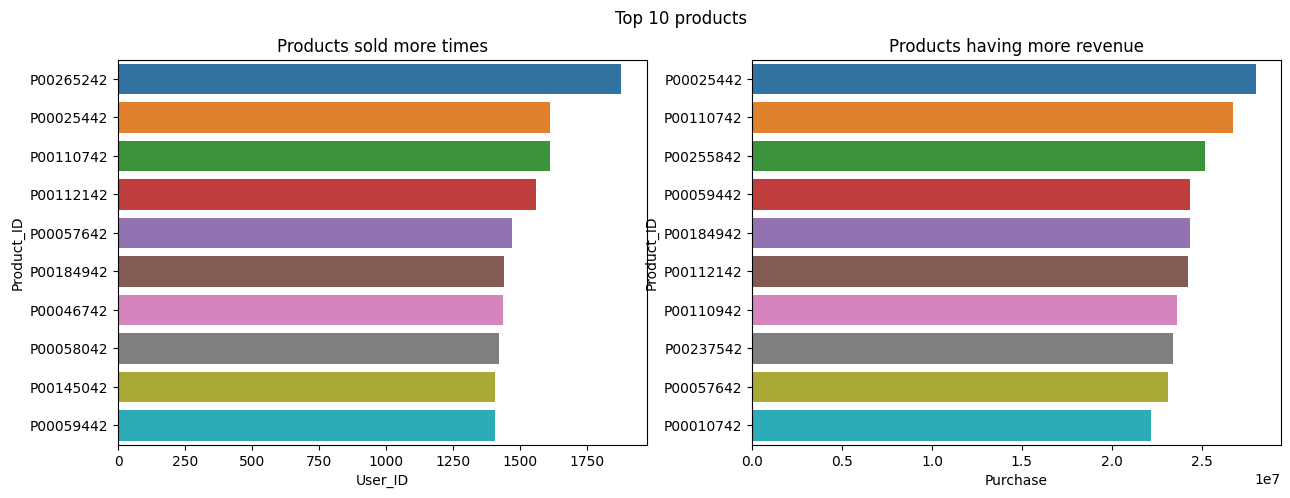

In [ ]:
# graphical Analysis

plt.figure(figsize=(15,5))
plt.suptitle("Top 10 products")
plt.subplot(1,2,1)
plt.title("Products sold more times")
sns.barplot(x=top_10_prdct,y=top_10_prdct.index,orient='h',hue=top_10_prdct.index)

plt.subplot(1,2,2)
plt.title("Products having more revenue")
sns.barplot(x=top_10_prdct_pur,y=top_10_prdct_pur.index,orient='h',hue=top_10_prdct_pur.index)

plt.show()

In [ ]:
# @title *GENDER*
# Changing Gender entries
walmart_df['Gender'].replace({'M':'Male',
                                     'F':'Female'},inplace=True)
# gender with number of time purchase made
walmart_df['Gender'].value_counts()

Male      414259
Female    135809
Name: Gender, dtype: int64

In [ ]:
# checking male and female customers
genderdf=walmart_df.groupby('Gender')['User_ID'].nunique().sort_values(ascending=False)
genderdf

Gender
Male      4225
Female    1666
Name: User_ID, dtype: int64

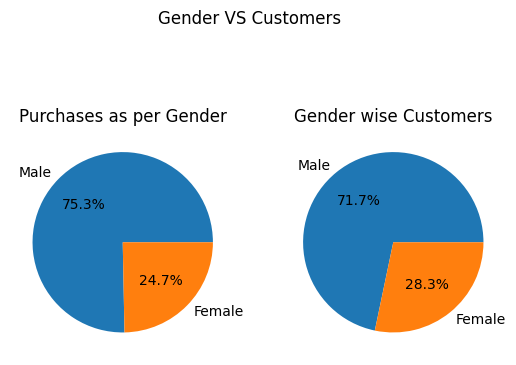

In [ ]:
# Graphical Analysis
plt.subplot(1,2,1)
plt.suptitle("Gender VS Customers")

plt.title("Purchases as per Gender")
plt.pie(walmart_df['Gender'].value_counts(),labels=walmart_df['Gender'].value_counts().index,autopct='%1.1f%%')

plt.subplot(1,2,2)
plt.title("Gender wise Customers")
plt.pie(genderdf,labels=genderdf.index,autopct='%1.1f%%')
plt.show()

- Sales are done by Males 414259 times accounts for 75% but by females almost 1/4th(25%) i.e., 135809 times.
- There are 4225(72%) Male and 1666 (28%)Female customers.

In [ ]:
# @title *AGE*
walmart_df['Age'].value_counts()


26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

In [ ]:
# Counting number of customers Age wise
age_df=walmart_df.groupby('Age')['User_ID'].nunique().sort_values(ascending=False)
age_df

Age
26-35    2053
36-45    1167
18-25    1069
46-50     531
51-55     481
55+       372
0-17      218
Name: User_ID, dtype: int64

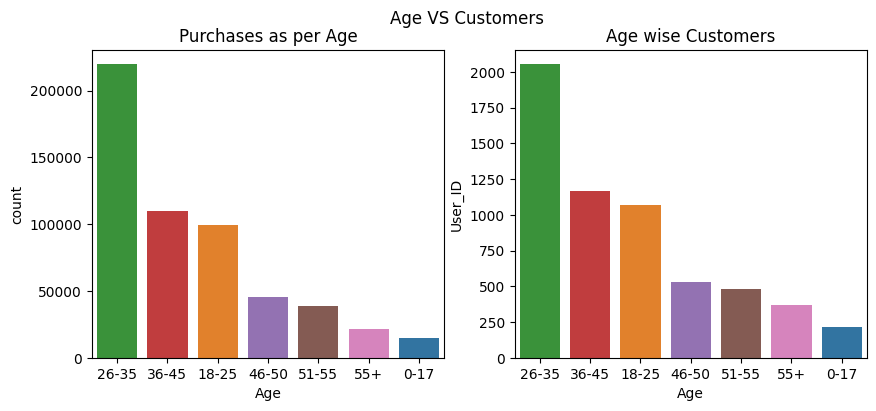

In [ ]:
# Graphical Analysis
plt.figure(figsize=(10,4))
plt.suptitle("Age VS Customers")

plt.subplot(1,2,1)
plt.title("Purchases as per Age")
sns.countplot(x=walmart_df['Age'],hue=walmart_df['Age'],order=walmart_df['Age'].value_counts().index)
plt.subplot(1,2,2)
plt.title("Age wise Customers")
sns.barplot(x=age_df.index,y=age_df,hue=age_df.index,order=age_df.index)
plt.show()

- The people with age group 26-35 bought most number of times followed by 36-45 and 18-25.
- The same range follows for number of customers too.
- The people below 17 years and above 55 are less in number.

In [ ]:
# @title *OCCUPATION*
walmart_df['Occupation'].value_counts()

4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64

In [ ]:
# Finding number of customers Occupation wise
occ_df=walmart_df.groupby('Occupation')['User_ID'].nunique().sort_values(ascending=False)
occ_df

Occupation
4     740
0     688
7     669
1     517
17    491
12    376
14    294
20    273
2     256
16    235
6     228
10    192
3     170
13    140
15    140
11    128
5     111
9      88
19     71
18     67
8      17
Name: User_ID, dtype: int64

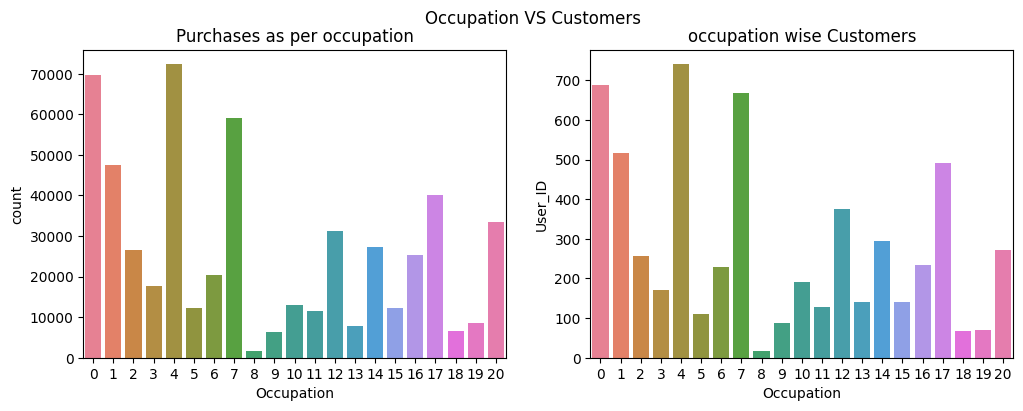

In [ ]:
# Graphical Analysis
plt.figure(figsize=(12,4))
plt.suptitle("Occupation VS Customers")

plt.subplot(1,2,1)
plt.title("Purchases as per occupation")
sns.countplot(x=walmart_df['Occupation'],hue=walmart_df['Occupation'],legend=False)

plt.subplot(1,2,2)
plt.title("occupation wise Customers")
sns.barplot(x=occ_df.index,y=occ_df,hue=occ_df.index,legend=False)
plt.show()

- The customers with Occupation 4,0 and 7 bought most number of times-72308,69638 and 59133 times respectively.
- The customers are more with same Ocuupation category too for occupation 4- 740,0-688 and 7-669.

In [ ]:
# @title *CITY CATEGORY*
walmart_df['City_Category'].value_counts()

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

In [ ]:
# Checking unique customers in each city
city_df=walmart_df.groupby('City_Category')['User_ID'].nunique().sort_values(ascending=False)
city_df

City_Category
C    3139
B    1707
A    1045
Name: User_ID, dtype: int64

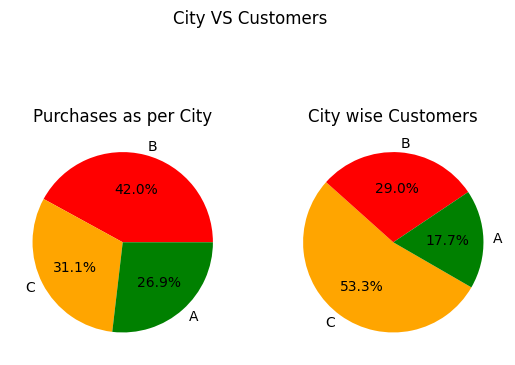

In [ ]:
# Graphical Analysis
plt.subplot(1,2,1)
plt.suptitle("City VS Customers")

plt.title("Purchases as per City")
plt.pie(walmart_df['City_Category'].value_counts(),labels=walmart_df['City_Category'].value_counts().index,autopct='%1.1f%%',colors=['red','orange','green'])

plt.subplot(1,2,2)
plt.title("City wise Customers")
plt.pie(city_df,labels=city_df.index,autopct='%1.1f%%',colors=['orange','red','green'],startangle=-30,counterclock=False)
plt.show()

- The most purchases are done by B City customers, 231 million times followed by C, 171 million and A,147 million.
- The customers are more from City C,3139 customers followed by B,1707 customers and A, 1045 customers only.
- City B accounts for 42 % sales while it has 29% customers only which shows B city customers are spending more.
-City C accounts for 31% sales while the customers are 53% in city C which shows that City C customers spends less averagely.
- City A has 17.7% customers but it made 26.9 % sales which again shows spend more pattern.

In [ ]:
# @title *STAY IN CURRENT CITY YEARS*
walmart_df['Stay_In_Current_City_Years'].value_counts()


1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64

In [ ]:
# Finding unique customers as per stay in current city
stay_city=walmart_df.groupby('Stay_In_Current_City_Years')['User_ID'].nunique().sort_values(ascending=False)
stay_city

Stay_In_Current_City_Years
1     2086
2     1145
3      979
4+     909
0      772
Name: User_ID, dtype: int64

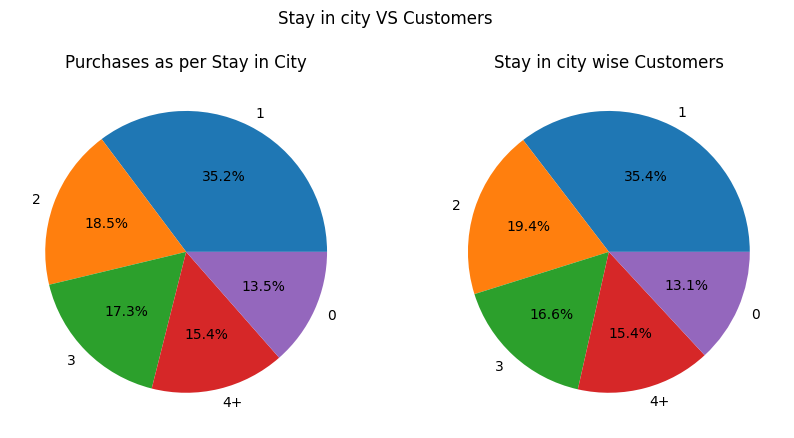

In [ ]:
# Graphical Analysis
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.suptitle("Stay in city VS Customers")

plt.title("Purchases as per Stay in City")
plt.pie(walmart_df['Stay_In_Current_City_Years'].value_counts(),labels=walmart_df['Stay_In_Current_City_Years'].value_counts().index,autopct='%1.1f%%')

plt.subplot(1,2,2)
plt.title("Stay in city wise Customers")
plt.pie(stay_city,labels=stay_city.index,autopct='%1.1f%%')
plt.show()

- Those who stay in current city for 1 year has made most purchases followed by 2,3,,4+ and 0.
- 1 year stay people bought 35.2% times of total purchases and they accounted for 35.4% customers also.
- The pattern is same for number of customers in these cities.
- The percent of customers and purchases done by them is same almost.
- We may conclude that people who are new in cities are more likely to buy from stores.

In [ ]:
# @title *MARITAL STATUS*
# changing values of marital status to more meaningful
walmart_df['Marital_Status'].replace({0:'Unmarried',
                                     1:'Married'},inplace=True)
# counting purchases according to marital status
walmart_df['Marital_Status'].value_counts()


Unmarried    324731
Married      225337
Name: Marital_Status, dtype: int64

In [ ]:
# finding customers as per marital status
mrg_df=walmart_df.groupby('Marital_Status')['User_ID'].nunique().sort_values(ascending=False)
mrg_df

Marital_Status
Unmarried    3417
Married      2474
Name: User_ID, dtype: int64

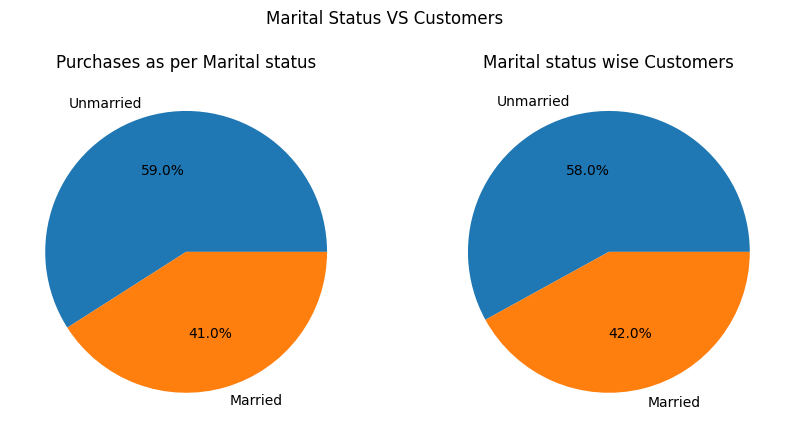

In [ ]:
# Graphical Analysis
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.suptitle("Marital Status VS Customers")

plt.title("Purchases as per Marital status")
plt.pie(walmart_df['Marital_Status'].value_counts(),labels=walmart_df['Marital_Status'].value_counts().index,autopct='%1.1f%%')

plt.subplot(1,2,2)
plt.title("Marital status wise Customers")
plt.pie(mrg_df,labels=mrg_df.index,autopct='%1.1f%%')
plt.show()

- The people who are unmarried buy more 3.24 million times than married,2.25 million times.
- The same trend in  number of customers is found with 3417 unmarried customers and 2474 married customers.
- The unmarried customers buy 59% times and accounts for 58% customers and maaried for 41% times and accounts for 42% customers, so the trend is same.

In [ ]:
# @title *PRODUCT CATEGORY*
walmart_df['Product_Category'].value_counts()

5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: Product_Category, dtype: int64

In [ ]:
# finding users buying products
prdct_cat=walmart_df.groupby('Product_Category')['User_ID'].nunique().sort_values(ascending=False)
prdct_cat

Product_Category
1     5767
5     5751
8     5659
2     4296
6     4085
3     3838
11    3583
4     3361
16    3130
20    2550
15    2440
10    2328
13    2272
19    1603
12    1567
7     1461
18    1284
14     971
17     426
9      410
Name: User_ID, dtype: int64

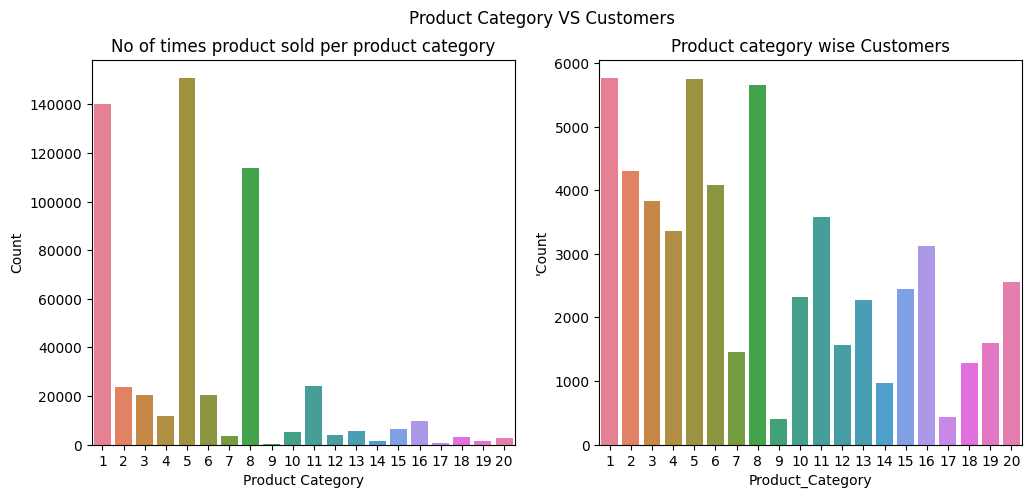

In [ ]:
# Graphical Analysis
plt.figure(figsize=(12,5))
plt.suptitle("Product Category VS Customers")

plt.subplot(1,2,1)
plt.title("No of times product sold per product category")
sns.barplot(x=walmart_df['Product_Category'].value_counts().index,y=walmart_df['Product_Category'].value_counts(),\
            hue=walmart_df['Product_Category'].value_counts().index,legend=False)
plt.xlabel("Product Category")
plt.ylabel('Count')
plt.subplot(1,2,2)
plt.title("Product category wise Customers")
sns.barplot(x=prdct_cat.index,y=prdct_cat,hue=prdct_cat.index,legend=False)
plt.ylabel("'Count")
plt.show()

- Product category 5,1, and 8 are sold most 1.5, 1.4 and 1.1 million number of times.
- Product category 1,5 and 8 are liked by maximum customers, the numbers are almost same near to 5700 customers.
- But for other products like 2,3,4,6,7,10-20 the trend is not same, they are not getting sold much times though bought by different customers, which shows that the repeated purcahses are less for these products.

In [ ]:
# @title *PURCHASE*
walmart_df['Purchase'].value_counts()


7011     191
7193     188
6855     187
6891     184
7012     183
        ... 
23491      1
18345      1
3372       1
855        1
21489      1
Name: Purchase, Length: 18105, dtype: int64

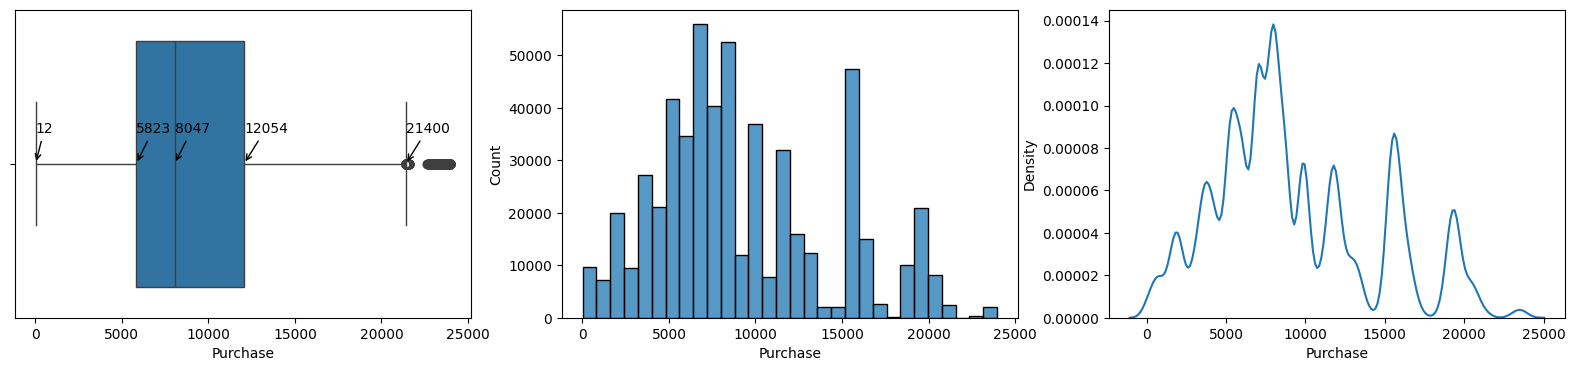

In [ ]:
# finding statistics
quartile1=np.percentile(walmart_df['Purchase'],25)
quartile3=np.percentile(walmart_df['Purchase'],75)
median=np.percentile(walmart_df['Purchase'],50)
range1=quartile3-quartile1
lowwhisk=max(quartile1-(range1*1.5),min(walmart_df['Purchase']))
upperwhisk=min(quartile3+(range1*1.5),max(walmart_df['Purchase']))

txt=[lowwhisk,quartile1,median,quartile3,upperwhisk]
txt1=[int(i) for i in txt]

# Graphical Analysis

fig,ax=plt.subplots(1,3,figsize=(20,4))
box=sns.boxplot(walmart_df['Purchase'],ax=ax[0],orient='h')
for i in range(5):
  box.annotate(txt1[i], xy=(txt[i],0), xytext=(txt[i],-0.1), arrowprops={'arrowstyle':'->'})


sns.histplot(walmart_df['Purchase'],bins=30,ax=ax[1])

sns.kdeplot(walmart_df['Purchase'],ax=ax[2])

plt.show()

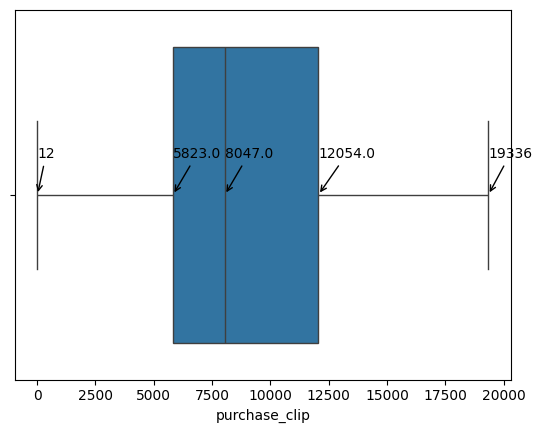

In [ ]:
# @title *REMOVING OUTLIERS*
walmart_df['purchase_clip']=np.clip(walmart_df['Purchase'],None,np.percentile(walmart_df['Purchase'],95))

quartile1=np.percentile(walmart_df['purchase_clip'],25)
quartile3=np.percentile(walmart_df['purchase_clip'],75)
median=np.percentile(walmart_df['purchase_clip'],50)
range1=quartile3-quartile1
lowwhisk=max(quartile1-(range1*1.5),min(walmart_df['purchase_clip']))
upperwhisk=min(quartile3+(range1*1.5),max(walmart_df['purchase_clip']))
txt=[lowwhisk,quartile1,median,quartile3,upperwhisk]


sns.boxplot(walmart_df['purchase_clip'],orient='h')

for i in range(5):
  plt.annotate(txt[i], xy=(txt[i],0), xytext=(txt[i],-0.1), arrowprops={'arrowstyle':'->'})
plt.show()

- We can see the presence of outliers in the purchase column as suspected earlier while doing statistical summary.
- Outliers shows that there are some instances when customers made high amount purchases.
- The data for purchase column is not following Normal distribution.
- The average range for purcahses is near 9000 which is prone to outliers as they are seem to be between 7000-8000.
- Outliers on the upper side of purchase are good for the business as they shows the prospect of increase in business area so i am keeping the same with creation of new column with outlier removal.

# *BIVARIATE ANALYSIS*

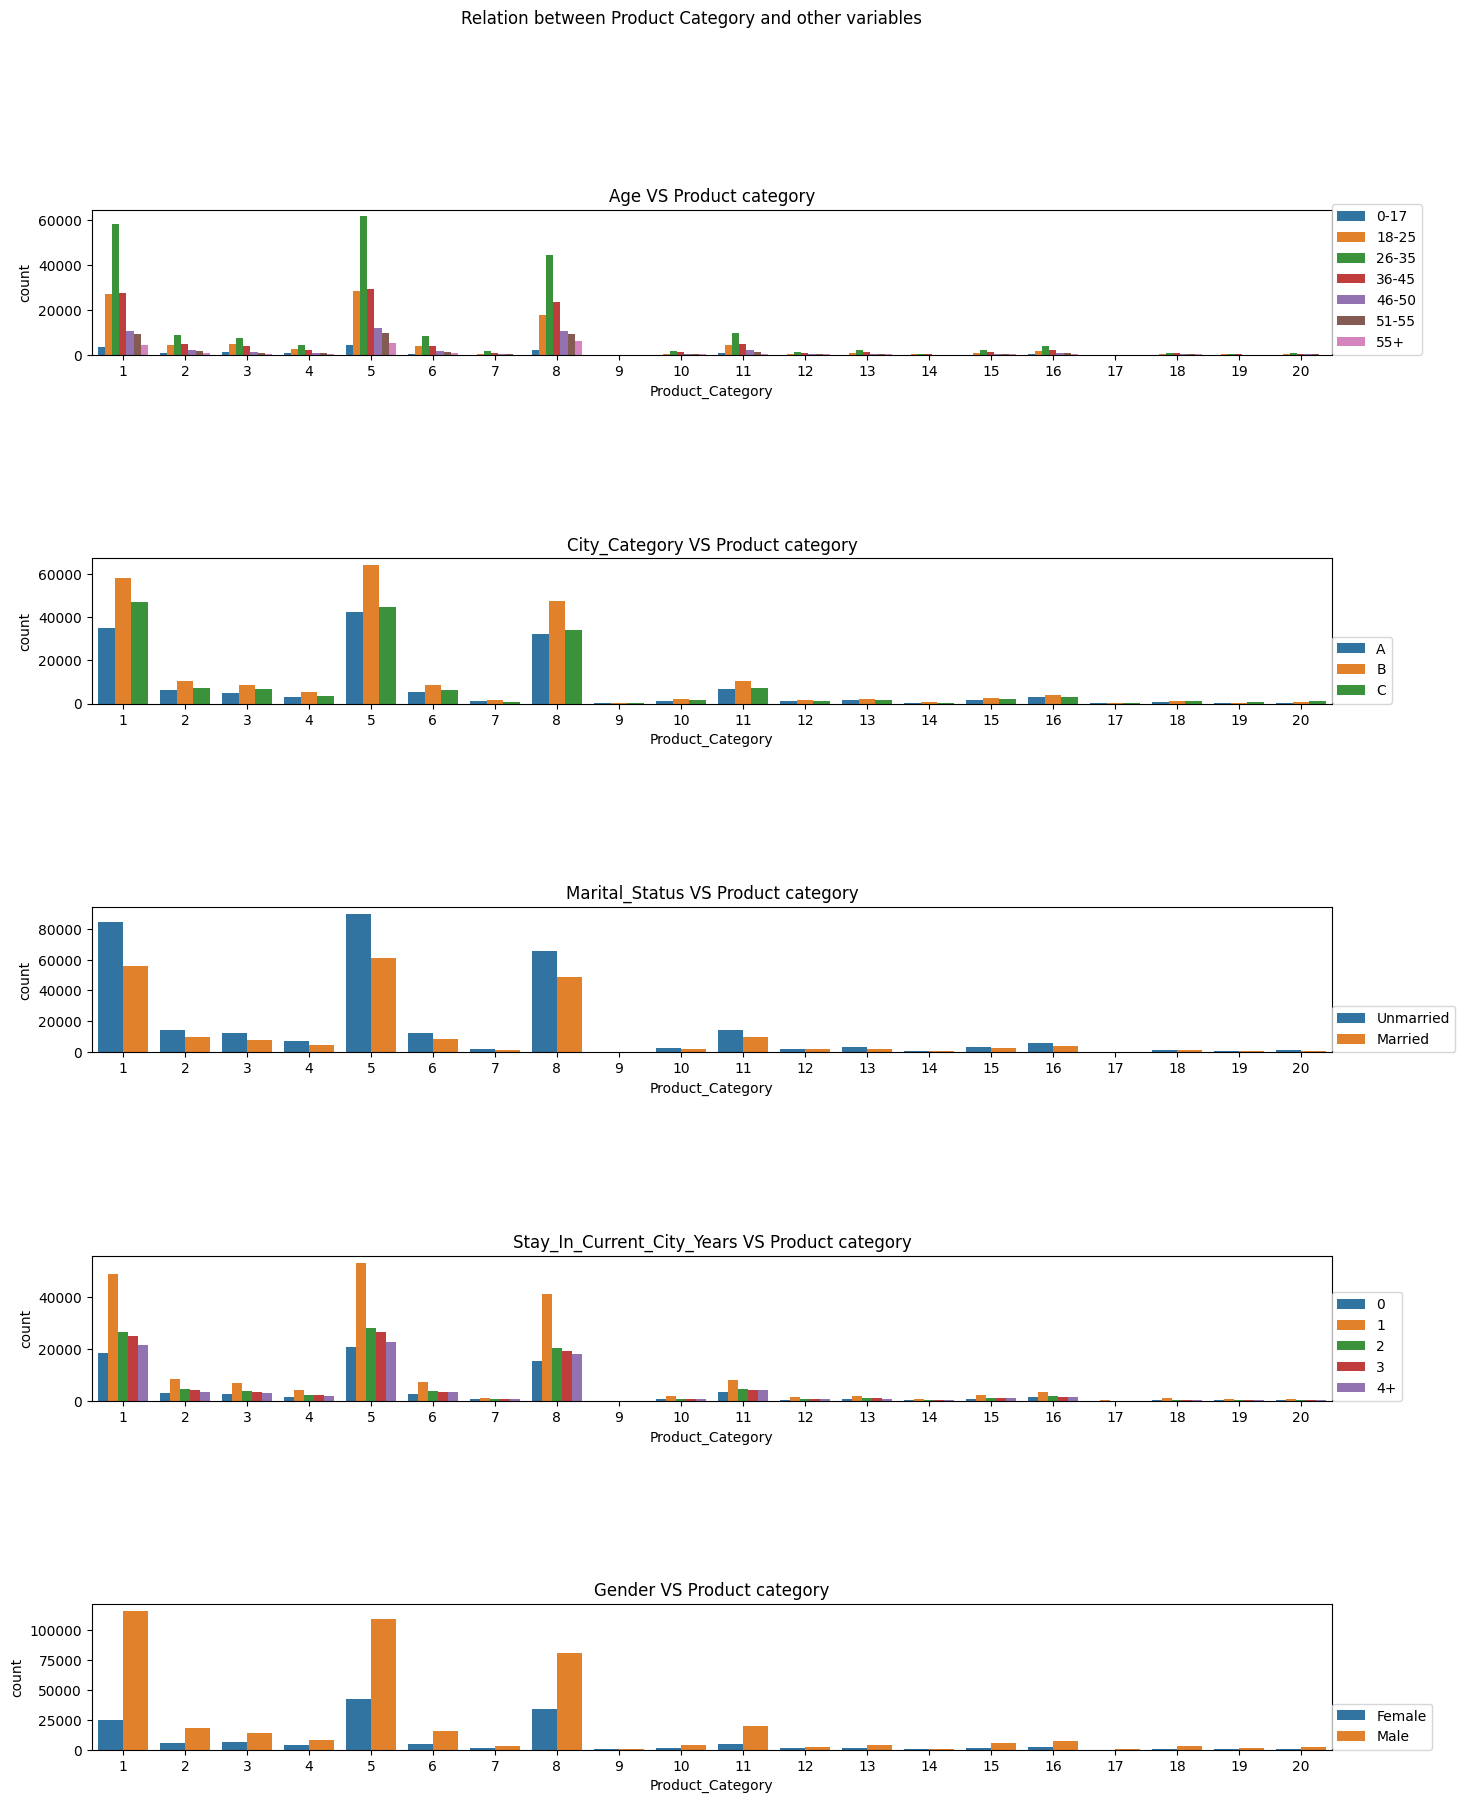

In [ ]:
# @title *PRODUCT CATEGORY WITH OTHER COLUMNS*

# finding relation between product category and other features through graphs
column=[ 'Age', 'City_Category','Marital_Status',
       'Stay_In_Current_City_Years','Gender']

plt.figure(figsize=(16,20))
plot=1
plt.suptitle("Relation between Product Category and other variables")
for col in column:
  plt.subplot(9,1,plot)
  plt.title(f"{col} VS Product category")
  sns.countplot(data=walmart_df,hue=col,x='Product_Category')
  plt.legend(loc=(1,0))
  plot+=2
plt.show()

*AGE RANGE AND PRODUCT CATEGORY*
- Product category 5, 1 and 8 are bought mostly by age groups more by 26-35,26-25,18-25 and by other categories too.
- Product Category 2,3,4,6 and 11 are also bought by various age people but the remaining product categories are sold less.
- Product Category 7,10,12,13,15,16 are sold too less.
- Product Category 9,14,17,18,19,20 are not bought by any age people much, approximately negligible.
- Age range dont have much impact for most of the categories products.

*CITY AND PRODUCT CATEGORY*
- As we have already seen City B customers are most frequesnt buyers they buy more for each product category followed by City C and City A. so Product Category sales are independent of City.

*MARITAL STATUS AND PRODUCT CATEGORY*
- In Marital Status too almost all category products are bought more by Unmarried people rather than married people.
- So marital status too dont have much impact on product category.

*STAY IN CURRENT CITY AND PRODUCT CATEGORY*
- Stay in current city dont have much impact on product category sales as 1 year stay customer bought almost every category products most bnumber of times followed by 2,3,4+ and 0.

*GENDER AND PRODUCT CATEGORY*
- Almost each product category is bought by males more than females.
- The difference is extreme for Product Category 1, followed by 5 and 8.

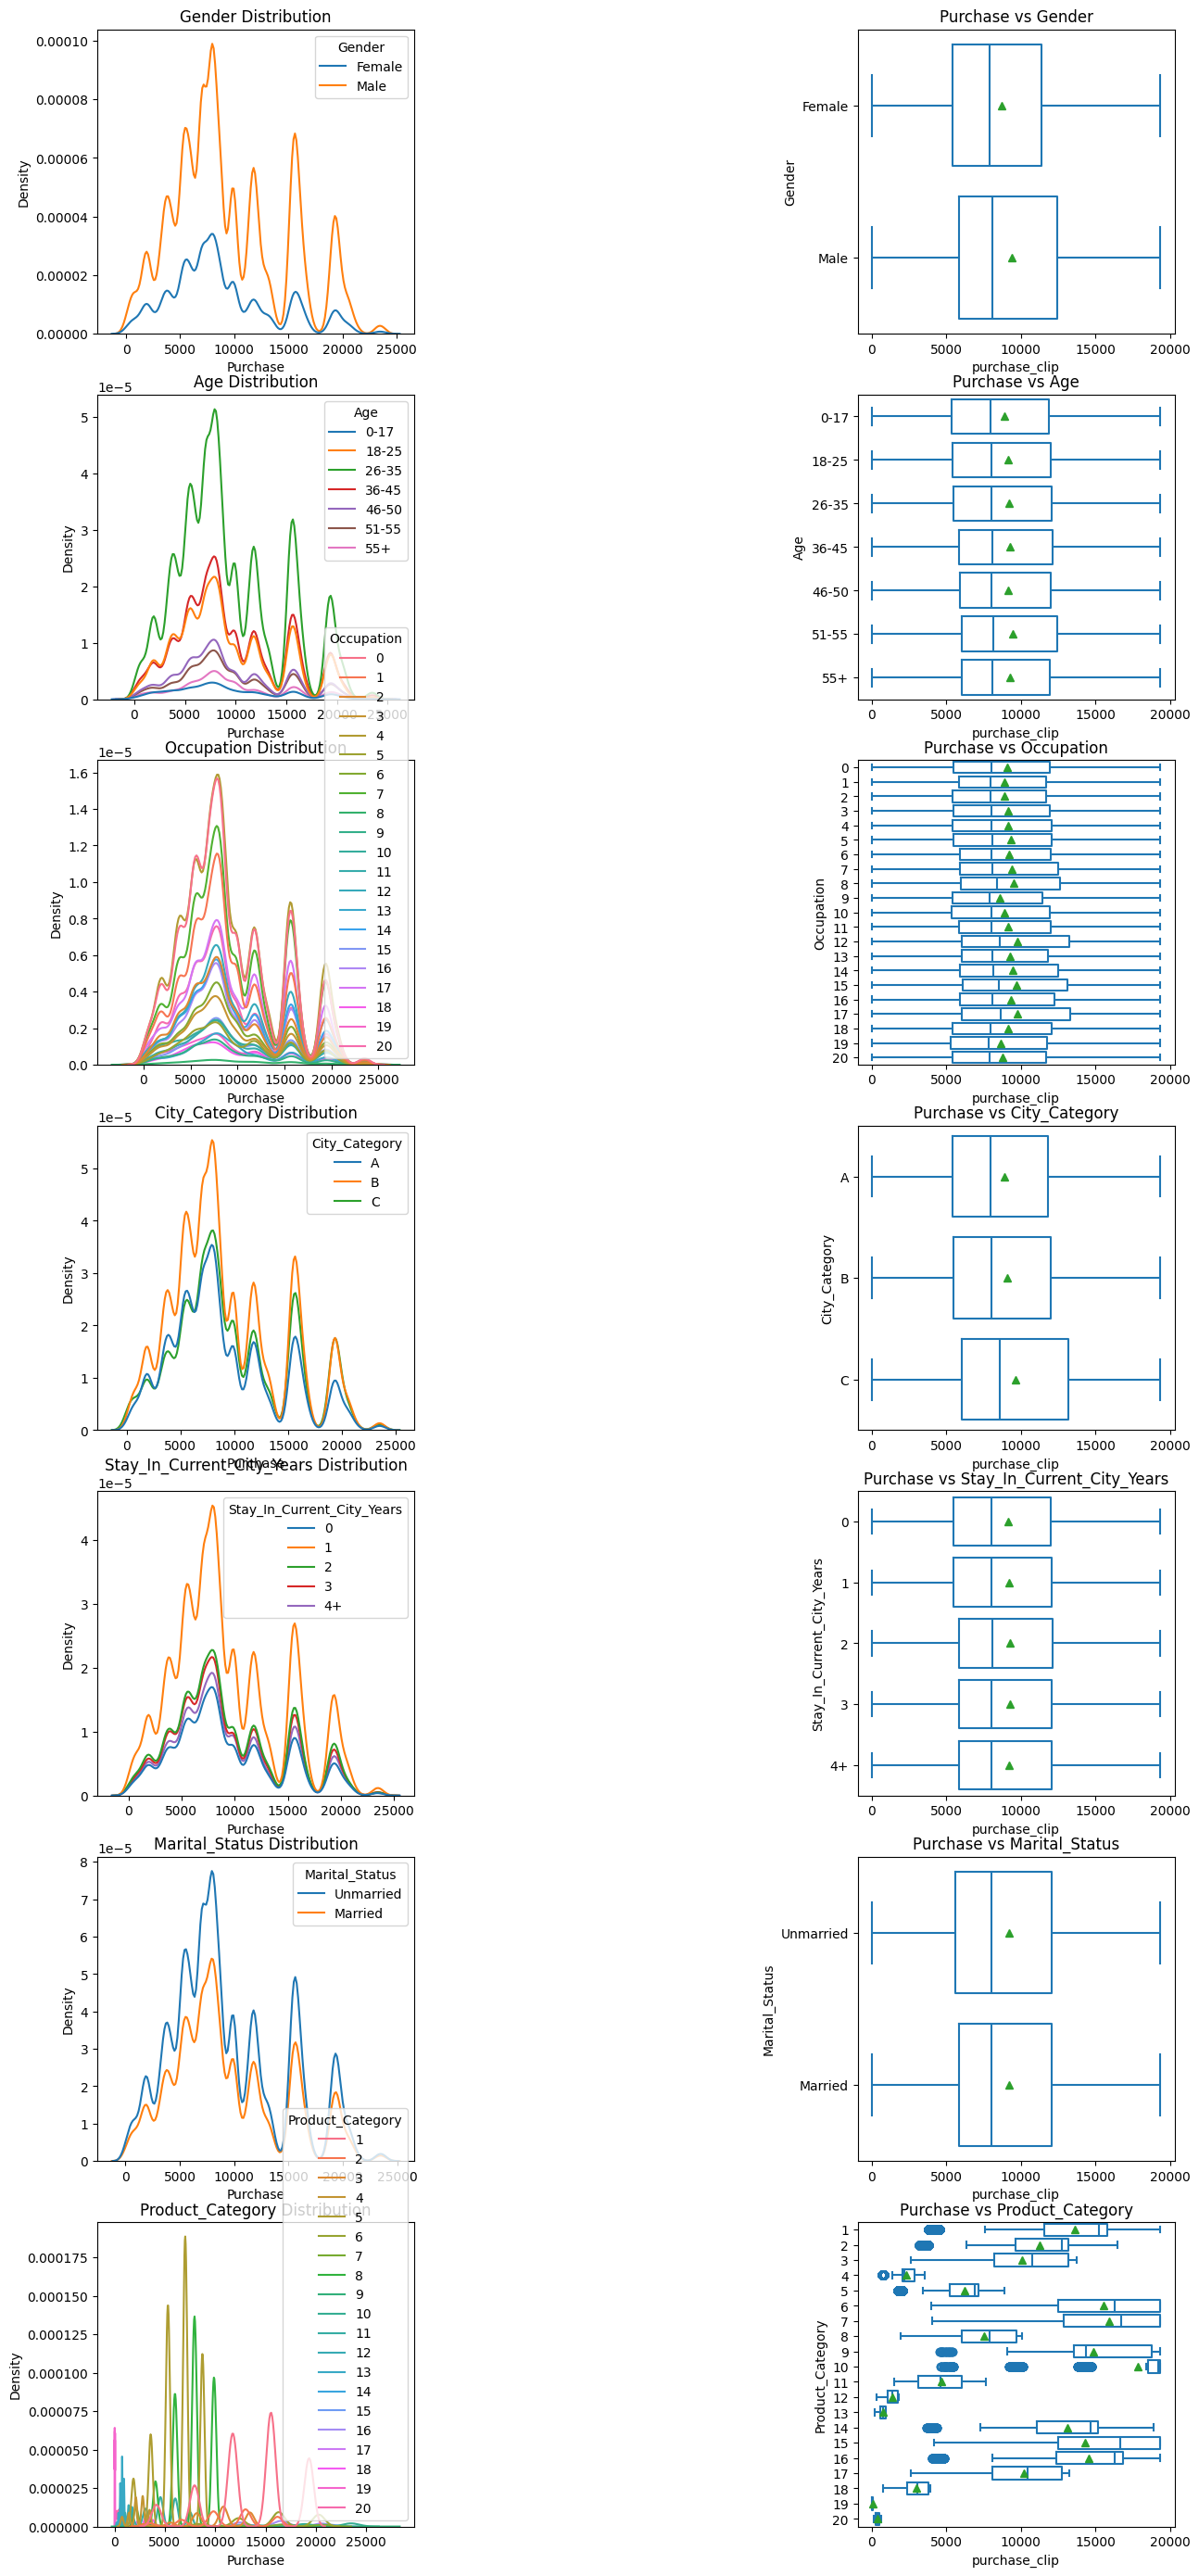

In [ ]:
# @title *PURCHASE RELATION WITH OTHER COLUMNS*
column=[ 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status','Product_Category']
plt.figure(figsize=(15,35))
plot=1
for col in column:
  plt.subplot(7,3,plot)
  sns.kdeplot(walmart_df,x='Purchase',hue=col)
  plt.title(f"{col} Distribution")


  plot+=2
  plt.subplot(7,3,plot)
  sns.boxplot(data=walmart_df,x='purchase_clip',y=col,fill=False,showmeans=True)
  plt.title(f"Purchase vs {col}")
  plot+=1
plt.show()

The kdeplots are shown with data having outliers but for boxplot without outliers data is used.

*GENDER VS PURCHASE*
- The sales done by Males is almost 3 times the same done by females though their averages,median and quartiles are quite similar, with females a bit towards less amount purchases.
- Outliers means high amount purchases are donr more by females.

*AGE VS PURCHASE*
- Purchases are done more by 26-35,36-45 and 18-25 age customers followed by 46-50,51-55,55+ and 0-17.
- Though it can be concluded that if the range become equal the range 46-55 will be in high purchase group too.
- The mean, median, quartiles are almost same for all age group with more high amount purchases(outliers) by 45-50 and 55+ age group customers.

*OCCUPATION VS PURCHASE*
- customer having occupation 4,0 and 7 are purchase more with 8,9 and 18 the least.
- The mean purchase of all Occupation are near to 1000 with 8 ,12, 15 and 17 on higher amount purchases.
- Outliers( High amount purchases) are more for 1,6,9,13, 19 and 20 occupation customer.

*CITY VS PURCHASE*
- City B customers bought more followed by A and C.
- For some amount A city people are more for some C but B is max for all ranges.
- The mean is almost same for A and B city people purchase while it is more for City C purchases.
- The high amount purchases are less for A and B with more outliers and less for C with no outliers as they usually go for high amount purchases.

*STAY IN CURRENT CITY VS PURCHASE*
- Customers who are living in current city is purchasing the most follwed by 2,3,4+ and 0.
- But the boxplot shows the same buying behaviour for all Customers irrespective of their stay in current city.

*MARITAL STATUS VS PURCHASE*
- Unmarried customers buy more than the married customers but their behaviour of buying is almost same as seen by boxplot with very few more outliers by married.

*PRODUCT CATEGORY VS PURCHASE*
- Product Category 1,5 and 8 accounted for maximum purchase amount with 19 and 20 with very less purchase.
- product Category 4,12,13,19 and 20 have very less amount sales concludes they are cheap product categories with sale for 4 is still high implies a positive product.
- The product category 6,7,9 and 15 are high cost products with sufficient sales.
- The product category 5 and 8 are near to 5k price products still accounts for highest sales makes them best category products.







# *MULTIVARIATE ANALYSIS*

In [ ]:
# @title *Products different Age group buying*
round(pd.crosstab(walmart_df['Age'],walmart_df['Product_Category'],normalize='index'),2)

Product_Category,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
Age,,,,,,,,,,,,,,,,,,,,
0-17,0.24,0.05,0.08,0.05,0.29,0.03,0.00,0.15,0.0,0.01,0.05,0.01,0.01,0.0,0.01,0.02,0.0,0.00,0.0,0.01
18-25,0.27,0.04,0.05,0.02,0.29,0.04,0.00,0.18,0.0,0.01,0.05,0.00,0.01,0.0,0.01,0.02,0.0,0.00,0.0,0.00
26-35,0.27,0.04,0.03,0.02,0.28,0.04,0.01,0.20,0.0,0.01,0.04,0.00,0.01,0.0,0.01,0.02,0.0,0.00,0.0,0.00
36-45,0.25,0.04,0.04,0.02,0.27,0.04,0.01,0.21,0.0,0.01,0.05,0.01,0.01,0.0,0.01,0.02,0.0,0.01,0.0,0.00
46-50,0.23,0.05,0.03,0.02,0.26,0.04,0.01,0.23,0.0,0.01,0.05,0.01,0.01,0.0,0.01,0.02,0.0,0.01,0.0,0.00
51-55,0.24,0.05,0.02,0.02,0.26,0.04,0.01,0.24,0.0,0.01,0.04,0.01,0.01,0.0,0.01,0.02,0.0,0.01,0.0,0.01
55+,0.21,0.04,0.02,0.01,0.25,0.04,0.01,0.29,0.0,0.02,0.03,0.02,0.01,0.0,0.01,0.02,0.0,0.01,0.0,0.01


In [ ]:
# Graphical Analysis
px.defaults.width = 800
px.defaults.height = 600
fig=px.sunburst(walmart_df,path=['Age','Product_Category'],color='Age',title='Product Category liking as per Age range')
fig.show()

- The age range dont have much impact on the product categories with all buying same product categories 1,5 and 8 more.
- Age Range 55+ buying Category 8 more and all other age range customers category 5 more.

In [ ]:
# @title *Relation between Age, Marital Status and Amount Spent*
round(pd.crosstab(index=walmart_df['Marital_Status'],columns=walmart_df['Age'],values=walmart_df['Purchase'],aggfunc='sum',normalize=True),3)


Age,0-17,18-25,26-35,36-45,46-50,51-55,55+
Marital_Status,,,,,,,
Unmarried,0.026,0.142,0.242,0.122,0.022,0.020,0.015
Married,0.000,0.037,0.157,0.079,0.060,0.052,0.025


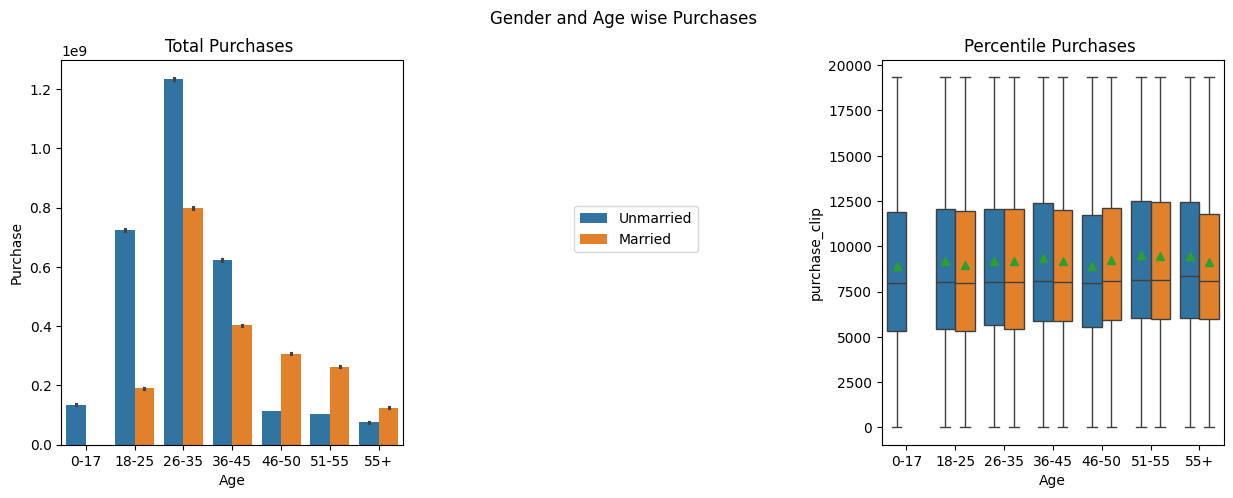

In [ ]:
# Graphical Analysis
plt.figure(figsize=(15,5))
plt.suptitle("Gender and Age wise Purchases")

plt.subplot(131)
sns.barplot(x=walmart_df['Age'],y=walmart_df['Purchase'],hue=walmart_df['Marital_Status'],estimator='sum')
plt.title("Total Purchases ")
plt.legend(loc=(1.5,0.5))

plt.subplot(133)
sns.boxplot(x=walmart_df['Age'],y=walmart_df['purchase_clip'],hue=walmart_df['Marital_Status'],showmeans=True,legend=False)
plt.title("Percentile Purchases ")
# plt.legend(loc=(-.25,0))

plt.show()

- Unmarried people bought more on average in Age range 0-17, 18-25, 26-35, 36-45 while married people people buy more in age range 46-50,51-55 and 55+.
- Though the average amount of purchase is almost same for all marital status with all age group customers.
- Unmarried customer with Age range 26-35 are responsible for 25% of the sales alone while unmarried 55+ for least.


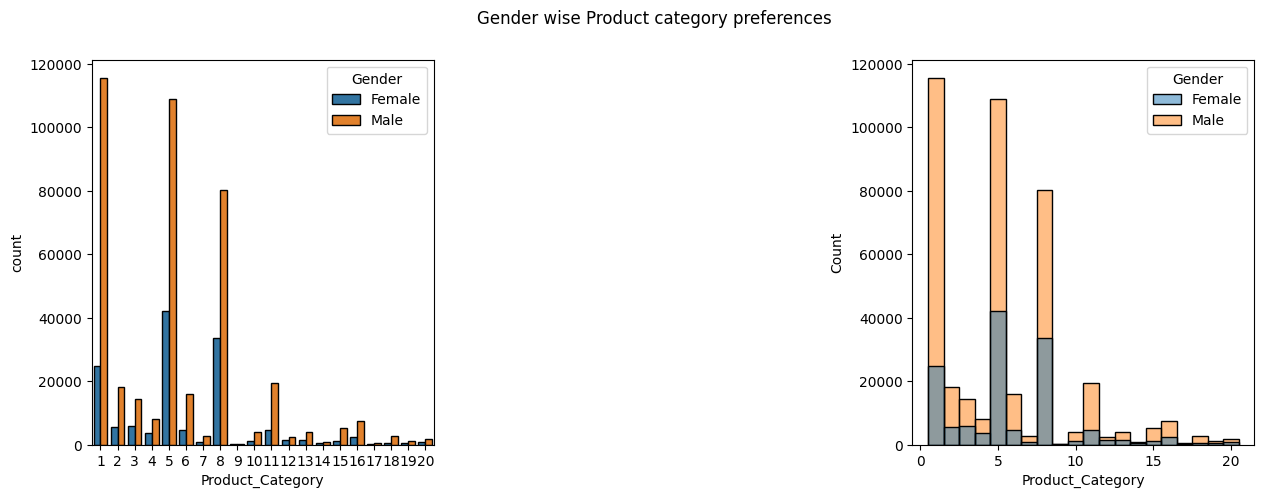

In [ ]:
# @title *Preffered Product Categories for Genders*

plt.figure(figsize=(15,5))
plt.suptitle("Gender wise Product category preferences")
plt.subplot(131)
sns.countplot(hue=walmart_df['Gender'],x=walmart_df['Product_Category'],edgecolor='black')

plt.subplot(133)
sns.histplot(data=walmart_df,x='Product_Category',hue='Gender')
plt.show()

px.defaults.width = 1264
px.defaults.height = 500
fig=px.sunburst(walmart_df,path=['Gender','Product_Category'],color='Gender')

fig.show()




- There is no specific relation as product category preferences between male and female as for all categories male buy more than females
- Though males prefers product Category 1 as more while females, product category 5. Infact in that too The males bought way more than females.

# *CENTRAL LIMIT THEOREM*


In [ ]:
# @title *Gender affect on amount spent*

# Mean Purchase
walmart_df.groupby(['Gender'])['Purchase'].mean()


Gender
Female    8734.565765
Male      9437.526040
Name: Purchase, dtype: float64

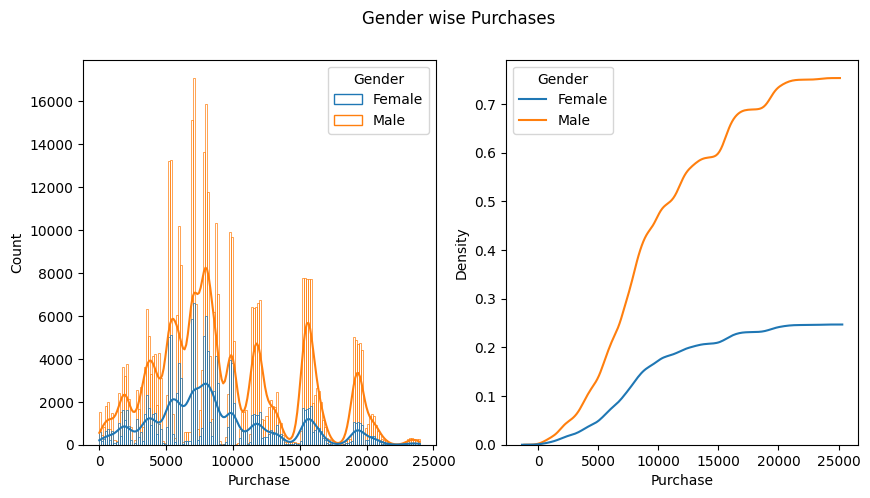

In [ ]:
# Checking Purchase distribution gender wise
plt.figure(figsize=(10,5))
plt.suptitle('Gender wise Purchases')
plt.subplot(121)
sns.histplot(x=walmart_df['Purchase'],hue=walmart_df['Gender'],kde=True,fill=False)

plt.subplot(122)
sns.kdeplot(x=walmart_df['Purchase'],hue=walmart_df['Gender'],cumulative=True)
plt.show()

Since the distribution is not Gaussian, cant infer much out of it, lets use CLT to make it Normal Distribution by taking different sample sizes

In [ ]:
# creating 2 different Purchase datas for male and female
male_df=walmart_df[walmart_df['Gender']=='Male']['Purchase']
female_df=walmart_df[walmart_df['Gender']=='Female']['Purchase']

In [ ]:
# Defining Custom function for finding Class Interval
def conf_int(data,k):
  low_ci=round(np.percentile(data,(100-k)/2),2)
  upper_ci=round(np.percentile(data,k+(100-k)/2),2)
  return low_ci,upper_ci

In [ ]:
# @title *Entire dataset mean range with 95% confidence interval*
print(f"For males, Purchase mean with 95% Confidence Interval lies in the range of {conf_int(male_df,95)}")
print(f"For females, Purchase mean with 95% Confidence Interval lies in the range of {conf_int(female_df,95)}")

For males, Purchase mean with 95% Confidence Interval lies in the range of (1436.0, 19925.0)
For females, Purchase mean with 95% Confidence Interval lies in the range of (1376.0, 19648.0)


Since not able to conclude anything due to overlap, lets do bootstrapping.

In [ ]:
# @title *300 samples mean range with 95% confidence interval*
male_sample_dist_smpl_mean_300=[np.random.choice(male_df,size=300).mean() for i in range(5000)]
female_sample_dist_smpl_mean_300=[np.random.choice(female_df,size=300).mean() for i in range(5000)]

print(f"For 300 male samples, Purchase mean with 95% Confidence Interval lies in the range of {conf_int(male_sample_dist_smpl_mean_300,95)}")
print(f"For 300 female samples, Purchase mean with 95% Confidence Interval lies in the range of {conf_int(female_sample_dist_smpl_mean_300,95)}")

For 300 male samples, Purchase mean with 95% Confidence Interval lies in the range of (8860.94, 10013.36)
For 300 female samples, Purchase mean with 95% Confidence Interval lies in the range of (8202.79, 9266.91)


Since there is overlapping of values,unable to conclude the difference in spending behaviour of males and females. Hence will increase the sample size to 3000.

In [ ]:
# @title *3000 samples mean range with 95% confidence interval*

male_sample_dist_smpl_mean_3000=[np.random.choice(male_df,size=3000).mean() for i in range(5000)]
female_sample_dist_smpl_mean_3000=[np.random.choice(female_df,size=3000).mean() for i in range(5000)]

print(f"For 3000 male samples, Purchase mean with 95% Confidence Interval lies in the range of {conf_int(male_sample_dist_smpl_mean_3000,95)}")
print(f"For 3000 female samples, Purchase mean with 95% Confidence Interval lies in the range of {conf_int(female_sample_dist_smpl_mean_3000,95)}")

For 3000 male samples, Purchase mean with 95% Confidence Interval lies in the range of (9252.39, 9617.43)
For 3000 female samples, Purchase mean with 95% Confidence Interval lies in the range of (8563.38, 8904.58)


The overlap in the males and female purchase mean value ended but Let us check can we coNclude the difference with the increased confidence interval.

In [ ]:
# @title *3000 samples mean range with 99% confidence interval*

print(f"For 3000 male samples, {conf_int(male_sample_dist_smpl_mean_3000,99)}")
print(f"For 3000 female samples, {conf_int(female_sample_dist_smpl_mean_3000,99)}")

For 3000 male samples, (9197.79, 9674.89)
For 3000 female samples, (8508.65, 8950.17)


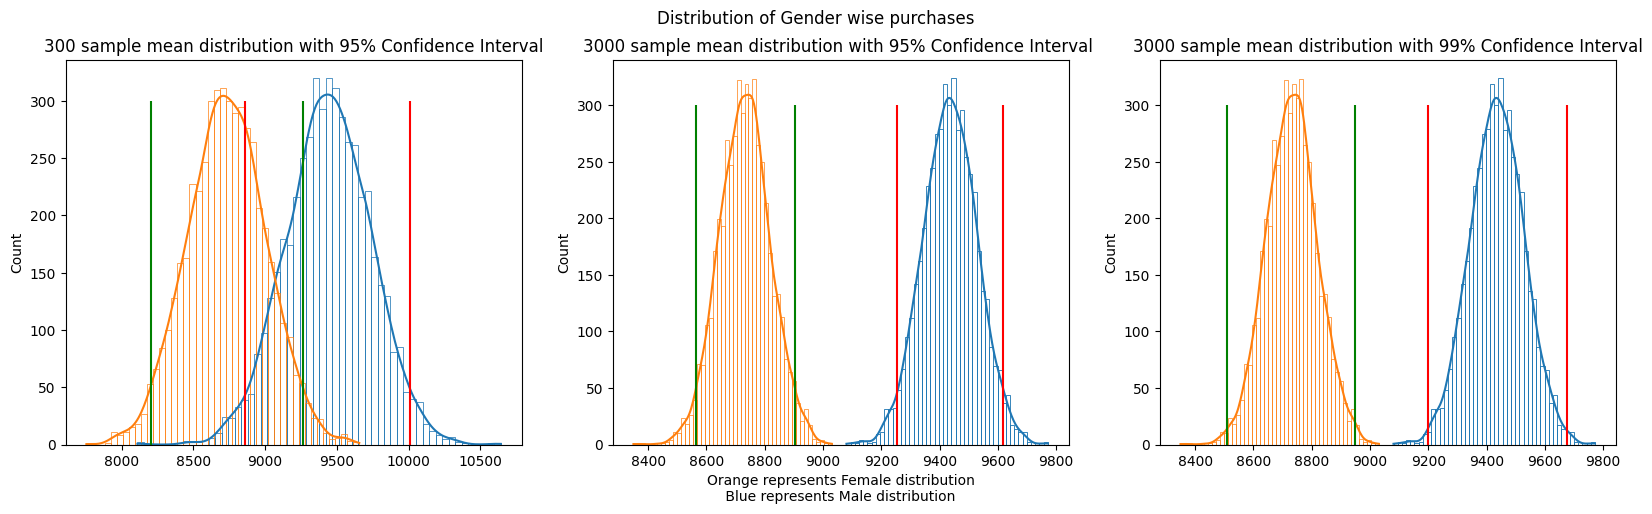

In [ ]:
# Graphical Analysis
plt.figure(figsize=(20,5))
plt.suptitle("Distribution of Gender wise purchases")
plt.subplot(131)
sns.histplot(male_sample_dist_smpl_mean_300,kde=True,fill=False)
sns.histplot(female_sample_dist_smpl_mean_300,kde=True,fill=False)
plt.vlines(np.percentile(male_sample_dist_smpl_mean_300,2.5),colors='red',ymin=0,ymax=300)
plt.vlines(np.percentile(male_sample_dist_smpl_mean_300,97.5),colors='red',ymin=0,ymax=300)
plt.vlines(np.percentile(female_sample_dist_smpl_mean_300,2.5),colors='green',ymin=0,ymax=300)
plt.vlines(np.percentile(female_sample_dist_smpl_mean_300,97.5),colors='green',ymin=0,ymax=300)
plt.title("300 sample mean distribution with 95% Confidence Interval")

plt.subplot(132)
sns.histplot(male_sample_dist_smpl_mean_3000,kde=True,fill=False)
sns.histplot(female_sample_dist_smpl_mean_3000,kde=True,fill=False)
plt.vlines(np.percentile(male_sample_dist_smpl_mean_3000,2.5),colors='red',ymin=0,ymax=300)
plt.vlines(np.percentile(male_sample_dist_smpl_mean_3000,97.5),colors='red',ymin=0,ymax=300)
plt.vlines(np.percentile(female_sample_dist_smpl_mean_3000,2.5),colors='green',ymin=0,ymax=300)
plt.vlines(np.percentile(female_sample_dist_smpl_mean_3000,97.5),colors='green',ymin=0,ymax=300)

plt.title("3000 sample mean distribution with 95% Confidence Interval ")
plt.xlabel("Orange represents Female distribution\n Blue represents Male distribution ")


plt.subplot(133)
sns.histplot(male_sample_dist_smpl_mean_3000,kde=True,fill=False)
sns.histplot(female_sample_dist_smpl_mean_3000,kde=True,fill=False)
plt.vlines(np.percentile(male_sample_dist_smpl_mean_3000,0.5),colors='red',ymin=0,ymax=300)
plt.vlines(np.percentile(male_sample_dist_smpl_mean_3000,99.5),colors='red',ymin=0,ymax=300)
plt.vlines(np.percentile(female_sample_dist_smpl_mean_3000,0.5),colors='green',ymin=0,ymax=300)
plt.vlines(np.percentile(female_sample_dist_smpl_mean_3000,99.5),colors='green',ymin=0,ymax=300)
plt.title("3000 sample mean distribution with 99% Confidence Interval")

plt.show()

- As we got the analysis that there are difference in spending behaviour of males and females we dont need to go to increase the sample size to 30000.
-When using the entire dataset,we were not able to conclude the difference in
spending behaviour because of the outliers which pulls the mean value of both male and female to be in the same levels causing overlap.
- Hence performed CI with sample size of 300 for 5000 iterations at 95% confidence interval,the results were same, there was overlap of levels in both male and female thus not able to conclude
- Increased sample size to 3000 for 5000 iterations at 95% CI and 99% confidence interval, there was no overlap. at 95% confidence Interval (3000 sample size) we were able to conclude that mean spending of male is more than the female.
- Male spend on an average of 9201-9675 while females 8517-8960.
- And with increase in confidence interval to 99% , the results were same but now more confident with the results.
- 95 % Confidence Interval range of entire dataset is wider fo rmale than females,it indicates that there is variability in the estimates for both male and female purchases.
- The wider range implie the data points are more dispersed for the males than feamles.
- With the increase in the sample size the width of the confidence interval starts reducing as increase in sample size decreasing chances of standard error and we can have more confident with our findings.
- The confidence interval overlap for the entire dataset and for 300 sample size but with 3000 sample size it is not overlapping.
- We have seen that the 300 sample size distribution is not much normally distributed which become a little more normally distributed with increase in sample size.

In [ ]:
# @title *Marital Status affect on amount spent*

# Mean Purchase
walmart_df.groupby(['Marital_Status'])['Purchase'].mean()


Marital_Status
Unmarried    9265.907619
Married      9261.174574
Name: Purchase, dtype: float64

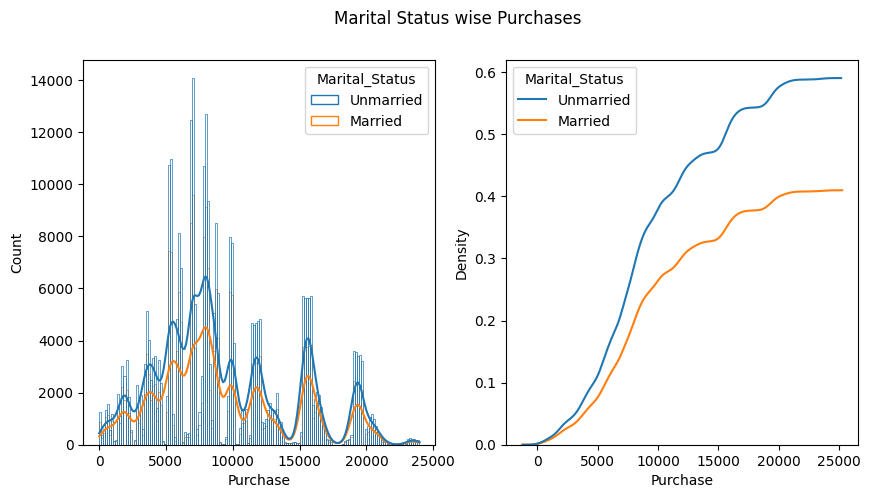

In [ ]:
# Checking Purchase distribution Marital Status wise

plt.figure(figsize=(10,5))
plt.suptitle('Marital Status wise Purchases')
plt.subplot(121)
sns.histplot(x=walmart_df['Purchase'],hue=walmart_df['Marital_Status'],kde=True,fill=False)

plt.subplot(122)
sns.kdeplot(x=walmart_df['Purchase'],hue=walmart_df['Marital_Status'],cumulative=True)
plt.show()

Since the distribution is not Gaussian, cant infer much out of it, lets use CLT to make it Normal Distribution by taking different sample sizes

In [ ]:
# creating different Purchase datas for married and unmarried

married_df=walmart_df[walmart_df['Marital_Status']=='Married']['Purchase']
unmarried_df=walmart_df[walmart_df['Marital_Status']=='Unmarried']['Purchase']

In [ ]:
# @title *Entire dataset mean range with 95% confidence interval*
print(f"For married, Purchase mean with 95% Confidence Interval lies in the range of {conf_int(married_df,95)}")
print(f"For unmarried, Purchase mean with 95% Confidence Interval lies in the range of {conf_int(unmarried_df,95)}")

For married, Purchase mean with 95% Confidence Interval lies in the range of (1399.0, 19707.0)
For unmarried, Purchase mean with 95% Confidence Interval lies in the range of (1429.0, 19701.0)


Since not able to conclude anything due to overlap, lets do bootstrapping.

In [ ]:
# @title *300 samples mean range with 95% confidence interval*

married_sample_dist_smpl_mean_300=[np.random.choice(married_df,size=300).mean() for i in range(5000)]
unmarried_sample_dist_smpl_mean_300=[np.random.choice(unmarried_df,size=300).mean() for i in range(5000)]

print(f"For 300 married customer samples, Purchase mean with 95% Confidence Interval lies in the range of {conf_int(married_sample_dist_smpl_mean_300,95)}")
print(f"For 300 unmarried customer samples,  Purchase mean with 95% Confidence Interval lies in the range of {conf_int(unmarried_sample_dist_smpl_mean_300,95)}")

For 300 married customer samples, Purchase mean with 95% Confidence Interval lies in the range of (8705.55, 9829.05)
For 300 unmarried customer samples,  Purchase mean with 95% Confidence Interval lies in the range of (8712.58, 9808.71)


Since there is overlapping of values,unable to conclude the difference in spending behaviour of married and unmarried. Hence will increase the sample size to 3000.

In [ ]:
# @title *3000 samples mean range with 95% confidence interval*

married_sample_dist_smpl_mean_3000=[np.random.choice(married_df,size=3000).mean() for i in range(5000)]
unmarried_sample_dist_smpl_mean_3000=[np.random.choice(unmarried_df,size=3000).mean() for i in range(5000)]

print(f"For 3000 married customer samples, Purchase mean with 95% Confidence Interval lies in the range of {conf_int(married_sample_dist_smpl_mean_3000,95)}")
print(f"For 3000 unmarried customer samples, Purchase mean with 95% Confidence Interval lies in the range of {conf_int(unmarried_sample_dist_smpl_mean_3000,95)}")

For 3000 married customer samples, Purchase mean with 95% Confidence Interval lies in the range of (9079.14, 9448.77)
For 3000 unmarried customer samples, Purchase mean with 95% Confidence Interval lies in the range of (9087.57, 9446.89)


Again there is overlapping of values,unable to conclude the difference in spending behaviour of married and unmarried. Hence will increase the sample size to 30000.

In [ ]:
# @title *30000 samples mean range with 95% confidence interval*

married_sample_dist_smpl_mean_30000=[np.random.choice(married_df,size=30000).mean() for i in range(5000)]
unmarried_sample_dist_smpl_mean_30000=[np.random.choice(unmarried_df,size=30000).mean() for i in range(5000)]

print(f"For 30000 married customer samples, Purchase mean with 95% Confidence Interval lies in the range of {conf_int(married_sample_dist_smpl_mean_30000,95)}")
print(f"For 30000 unmarried customer samples, Purchase mean with 95% Confidence Interval lies in the range of {conf_int(unmarried_sample_dist_smpl_mean_30000,95)}")

For 30000 married customer samples, Purchase mean with 95% Confidence Interval lies in the range of (9204.03, 9317.82)
For 30000 unmarried customer samples, Purchase mean with 95% Confidence Interval lies in the range of (9206.92, 9322.75)


As there is still too much overlapping of values,there is no  benefit of increasing the sample size as its hinting towards similarity of spending behaviour.

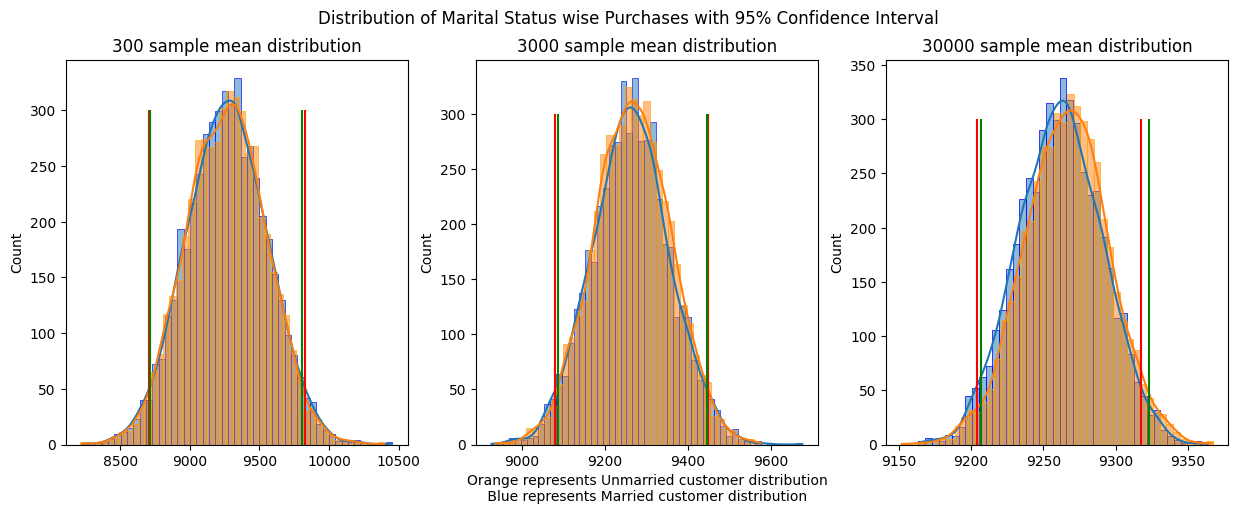

In [ ]:
# Graphical Analysis
plt.figure(figsize=(15,5))
plt.suptitle("Distribution of Marital Status wise Purchases with 95% Confidence Interval")
plt.subplot(131)
sns.histplot(married_sample_dist_smpl_mean_300,kde=True,edgecolor='blue')
sns.histplot(unmarried_sample_dist_smpl_mean_300,kde=True,edgecolor='orange')
plt.vlines(np.percentile(married_sample_dist_smpl_mean_300,2.5),colors='red',ymin=0,ymax=300)
plt.vlines(np.percentile(married_sample_dist_smpl_mean_300,97.5),colors='red',ymin=0,ymax=300)
plt.vlines(np.percentile(unmarried_sample_dist_smpl_mean_300,2.5),colors='green',ymin=0,ymax=300)
plt.vlines(np.percentile(unmarried_sample_dist_smpl_mean_300,97.5),colors='green',ymin=0,ymax=300)
plt.title("300 sample mean distribution")

plt.subplot(132)
sns.histplot(married_sample_dist_smpl_mean_3000,kde=True,edgecolor='blue')
sns.histplot(unmarried_sample_dist_smpl_mean_3000,kde=True,edgecolor='orange')
plt.title("3000 sample mean distribution")
plt.xlabel("Orange represents Unmarried customer distribution\n Blue represents Married customer distribution ")
plt.vlines(np.percentile(married_sample_dist_smpl_mean_3000,2.5),colors='red',ymin=0,ymax=300)
plt.vlines(np.percentile(married_sample_dist_smpl_mean_3000,97.5),colors='red',ymin=0,ymax=300)
plt.vlines(np.percentile(unmarried_sample_dist_smpl_mean_3000,2.5),colors='green',ymin=0,ymax=300)
plt.vlines(np.percentile(unmarried_sample_dist_smpl_mean_3000,97.5),colors='green',ymin=0,ymax=300)

plt.subplot(133)
sns.histplot(married_sample_dist_smpl_mean_30000,kde=True,edgecolor='blue')
sns.histplot(unmarried_sample_dist_smpl_mean_30000,kde=True,edgecolor='orange')
plt.vlines(np.percentile(married_sample_dist_smpl_mean_30000,2.5),colors='red',ymin=0,ymax=300)
plt.vlines(np.percentile(married_sample_dist_smpl_mean_30000,97.5),colors='red',ymin=0,ymax=300)
plt.vlines(np.percentile(unmarried_sample_dist_smpl_mean_30000,2.5),colors='green',ymin=0,ymax=300)
plt.vlines(np.percentile(unmarried_sample_dist_smpl_mean_30000,97.5),colors='green',ymin=0,ymax=300)
plt.title("30000 sample mean distribution")

plt.show()

- With entire dataset we are not able to find the difference between both groups spending behaviour due to total overlap.
- Performed CI with sample size of 300 for 5000 iterations at 95% Confidence interval,the result is  there was overlap in married and unmarried purchase amount, hence unable to conclude
- Increased sample size to 3000 for 5000 iterations at 95% Confidence interval,there was overlap for both married and unmarried purchase amount,hence unable to conclude
- Increased sample size to 30000 for 5000 iterations at 95% Confidence interval, there was still overlap for both so the average spending behaviour of married and unmarried are same.
- The difference in the width of confidence interval of entire dataset is approx 40. which decreased to 2 with increase in sample sizes which implies that the data points are dispersed in almost same manner.
- Overlapping in both groups even with increase in sample sizes implies that both groups have same mean purchases irrespective of no of time they bought products.
- The width of confidence interval for entire dataset was as wide as 18000 which reduced to 100 with 30000 samples which shows the decrease in variablity of datapoints with increase in sample size.
- The shape of distribution of dataset was not normally distributed but it become so with  increase in sample sizes.


In [ ]:
# @title *Age affect on amount spent*

# Mean Purchase
walmart_df.groupby(['Age'])['Purchase'].mean()


Age
0-17     8933.464640
18-25    9169.663606
26-35    9252.690633
36-45    9331.350695
46-50    9208.625697
51-55    9534.808031
55+      9336.280459
Name: Purchase, dtype: float64

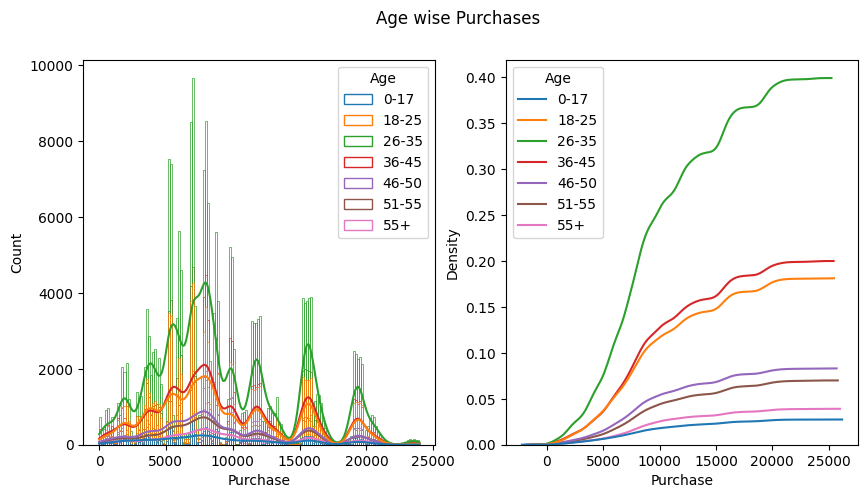

In [ ]:
# Checking Purchase distribution Age wise

plt.figure(figsize=(10,5))
plt.suptitle('Age wise Purchases')
plt.subplot(121)
sns.histplot(x=walmart_df['Purchase'],hue=walmart_df['Age'],kde=True,fill=False)

plt.subplot(122)
sns.kdeplot(x=walmart_df['Purchase'],hue=walmart_df['Age'],cumulative=True)
plt.show()

Since the distribution is not Gaussian, cant infer much out of it, lets use CLT to make it Normal Distribution by taking different sample sizes

In [ ]:
# creating different Purchase datas for different age groups

child_samp=walmart_df[walmart_df['Age']=='0-17']['Purchase']
youth_samp=walmart_df[walmart_df['Age']=='18-25']['Purchase']
youngadult_samp=walmart_df[walmart_df['Age']=='26-35']['Purchase']
middleadult_samp=walmart_df[walmart_df['Age']=='36-45']['Purchase']
matureadult_samp=walmart_df[walmart_df['Age']=='46-50']['Purchase']
oldadult_samp=walmart_df[walmart_df['Age']=='51-55']['Purchase']
old_samp=walmart_df[walmart_df['Age']=='55+']['Purchase']



In [ ]:
# @title *Entire dataset mean range with 95% confidence interval*
print(f"For 0-17 Age group, Purchase mean with 95% Confidence Interval lies in the range of {conf_int(child_samp,95)}")
print(f"For 18-25 Age group, Purchase mean with 95% Confidence Interval lies in the range of {conf_int(youth_samp,95)}")
print(f"For 26-35 Age group, Purchase mean with 95% Confidence Interval lies in the range of {conf_int(youngadult_samp,95)}")
print(f"For 36-45 Age group, Purchase mean with 95% Confidence Interval lies in the range of {conf_int(middleadult_samp,95)}")
print(f"For 46-50 Age group, Purchase mean with 95% Confidence Interval lies in the range of {conf_int(matureadult_samp,95)}")
print(f"For 50-55 Age group, Purchase mean with 95% Confidence Interval lies in the range of {conf_int(oldadult_samp,95)}")
print(f"For 55+ Age group, Purchase mean with 95% Confidence Interval lies in the range of {conf_int(old_samp,95)}")


For 0-17 Age group, Purchase mean with 95% Confidence Interval lies in the range of (1051.58, 19669.47)
For 18-25 Age group, Purchase mean with 95% Confidence Interval lies in the range of (1464.48, 19673.0)
For 26-35 Age group, Purchase mean with 95% Confidence Interval lies in the range of (1513.65, 19698.0)
For 36-45 Age group, Purchase mean with 95% Confidence Interval lies in the range of (1392.0, 19703.0)
For 46-50 Age group, Purchase mean with 95% Confidence Interval lies in the range of (1076.0, 19698.0)
For 50-55 Age group, Purchase mean with 95% Confidence Interval lies in the range of (1080.5, 20228.5)
For 55+ Age group, Purchase mean with 95% Confidence Interval lies in the range of (932.0, 20176.12)


Since not able to conclude anything due to overlap, lets do bootstrapping.

In [ ]:
# @title *300 samples mean range with 95% confidence interval*

child_samp_dist_samp_mean_300=[child_samp.sample(300).mean() for i in range(2000)]
youth_samp_dist_samp_mean_300=[youth_samp.sample(300).mean() for i in range(2000)]
youngadult_samp_dist_samp_mean_300=[youngadult_samp.sample(300).mean() for i in range(2000)]
middleadult_samp_dist_samp_mean_300=[middleadult_samp.sample(300).mean() for i in range(2000)]
matureadult_samp_dist_samp_mean_300=[matureadult_samp.sample(300).mean() for i in range(2000)]
oldadult_samp_dist_samp_mean_300=[oldadult_samp.sample(300).mean() for i in range(2000)]
old_samp_dist_samp_mean_300=[old_samp.sample(300).mean() for i in range(2000)]

print(f"For 300 0-17 Age customer samples, Purchase mean with 95% Confidence Interval lies in the range of {conf_int(child_samp_dist_samp_mean_300,95)}")
print(f"For 300 18-25 Age customer samples, Purchase mean with 95% Confidence Interval lies in the range of {conf_int(youth_samp_dist_samp_mean_300,95)}")
print(f"For 300 26-35 Age customer samples,Purchase mean with 95% Confidence Interval lies in the range of {conf_int(youngadult_samp_dist_samp_mean_300,95)}")
print(f"For 300 36-45 Age customer samples, Purchase mean with 95% Confidence Interval lies in the range of {conf_int(middleadult_samp_dist_samp_mean_300,95)}")
print(f"For 300 46-50 Age customer samples, Purchase mean with 95% Confidence Interval lies in the range of {conf_int(matureadult_samp_dist_samp_mean_300,95)}")
print(f"For 300 51-55 Age customer samples, Purchase mean with 95% Confidence Interval lies in the range of {conf_int(oldadult_samp_dist_samp_mean_300,95)}")
print(f"For 300 55+ Age customer samples, Purchase mean with 95% Confidence Interval lies in the range of {conf_int(old_samp_dist_samp_mean_300,95)}")

For 300 0-17 Age customer samples, Purchase mean with 95% Confidence Interval lies in the range of (8365.61, 9492.63)
For 300 18-25 Age customer samples, Purchase mean with 95% Confidence Interval lies in the range of (8597.3, 9743.88)
For 300 26-35 Age customer samples,Purchase mean with 95% Confidence Interval lies in the range of (8699.78, 9812.94)
For 300 36-45 Age customer samples, Purchase mean with 95% Confidence Interval lies in the range of (8764.09, 9895.29)
For 300 46-50 Age customer samples, Purchase mean with 95% Confidence Interval lies in the range of (8673.44, 9756.42)
For 300 51-55 Age customer samples, Purchase mean with 95% Confidence Interval lies in the range of (8985.64, 10083.2)
For 300 55+ Age customer samples, Purchase mean with 95% Confidence Interval lies in the range of (8783.8, 9875.37)


Since there is overlapping of values,unable to conclude the difference in spending behaviour of different Age groups. Hence will increase the sample size to 3000.

In [ ]:
# @title *3000 samples mean range with 95% confidence interval*

child_samp_dist_samp_mean_3000=[child_samp.sample(3000).mean() for i in range(5000)]
youth_samp_dist_samp_mean_3000=[youth_samp.sample(3000).mean() for i in range(5000)]
youngadult_samp_dist_samp_mean_3000=[youngadult_samp.sample(3000).mean() for i in range(5000)]
middleadult_samp_dist_samp_mean_3000=[middleadult_samp.sample(3000).mean() for i in range(5000)]
matureadult_samp_dist_samp_mean_3000=[matureadult_samp.sample(3000).mean() for i in range(5000)]
oldadult_samp_dist_samp_mean_3000=[oldadult_samp.sample(3000).mean() for i in range(5000)]
old_samp_dist_samp_mean_3000=[old_samp.sample(3000).mean() for i in range(5000)]

print(f"For 3000 0-17 Age customer samples, Purchase mean with 95% Confidence Interval lies in the range of {conf_int(child_samp_dist_samp_mean_3000,95)}")
print(f"For 3000 18-25 Age customer samples, Purchase mean with 95% Confidence Interval lies in the range of {conf_int(youth_samp_dist_samp_mean_3000,95)}")
print(f"For 3000 26-35 Age customer samples, Purchase mean with 95% Confidence Interval lies in the range of {conf_int(youngadult_samp_dist_samp_mean_3000,95)}")
print(f"For 3000 36-45 Age customer samples, Purchase mean with 95% Confidence Interval lies in the range of {conf_int(middleadult_samp_dist_samp_mean_3000,95)}")
print(f"For 3000 46-50 Age customer samples, Purchase mean with 95% Confidence Interval lies in the range of {conf_int(matureadult_samp_dist_samp_mean_3000,95)}")
print(f"For 3000 51-55 Age customer samples, Purchase mean with 95% Confidence Interval lies in the range of {conf_int(oldadult_samp_dist_samp_mean_3000,95)}")
print(f"For 3000 55+ Age customer samples, Purchase mean with 95% Confidence Interval lies in the range of {conf_int(old_samp_dist_samp_mean_3000,95)}")

For 3000 0-17 Age customer samples, Purchase mean with 95% Confidence Interval lies in the range of (8770.55, 9097.23)
For 3000 18-25 Age customer samples, Purchase mean with 95% Confidence Interval lies in the range of (8986.21, 9348.41)
For 3000 26-35 Age customer samples, Purchase mean with 95% Confidence Interval lies in the range of (9072.1, 9427.98)
For 3000 36-45 Age customer samples, Purchase mean with 95% Confidence Interval lies in the range of (9155.17, 9505.75)
For 3000 46-50 Age customer samples, Purchase mean with 95% Confidence Interval lies in the range of (9037.04, 9380.88)
For 3000 51-55 Age customer samples, Purchase mean with 95% Confidence Interval lies in the range of (9362.55, 9708.86)
For 3000 55+ Age customer samples, Purchase mean with 95% Confidence Interval lies in the range of (9171.07, 9508.51)


Since there is overlapping of values,unable to conclude the difference in spending behaviour of different age groups. Hence will increase the sample size to 30000.

In [ ]:
# @title *30000 samples mean range with 95% confidence interval*

child_samp_dist_samp_mean_30000=[np.random.choice(child_samp,size=30000).mean() for i in range(5000)]
youth_samp_dist_samp_mean_30000=[np.random.choice(youth_samp,size=30000).mean() for i in range(5000)]
youngadult_samp_dist_samp_mean_30000=[np.random.choice(youngadult_samp,size=30000).mean() for i in range(5000)]
middleadult_samp_dist_samp_mean_30000=[np.random.choice(middleadult_samp,size=30000).mean() for i in range(5000)]
matureadult_samp_dist_samp_mean_30000=[np.random.choice(matureadult_samp,size=30000).mean() for i in range(5000)]
oldadult_samp_dist_samp_mean_30000=[np.random.choice(oldadult_samp,size=30000).mean() for i in range(5000)]
old_samp_dist_samp_mean_30000=[np.random.choice(old_samp,size=30000).mean() for i in range(5000)]

print(f"For 30000 0-17 Age customer samples, Purchase mean with 95% Confidence Interval lies in the range of {conf_int(child_samp_dist_samp_mean_30000,95)}")
print(f"For 30000 18-25 Age customer samples, Purchase mean with 95% Confidence Interval lies in the range of {conf_int(youth_samp_dist_samp_mean_30000,95)}")
print(f"For 30000 26-35 Age customer samples, Purchase mean with 95% Confidence Interval lies in the range of {conf_int(youngadult_samp_dist_samp_mean_30000,95)}")
print(f"For 30000 36-45 Age customer samples, Purchase mean with 95% Confidence Interval lies in the range of {conf_int(middleadult_samp_dist_samp_mean_30000,95)}")
print(f"For 30000 46-50 Age customer samples, Purchase mean with 95% Confidence Interval lies in the range of {conf_int(matureadult_samp_dist_samp_mean_30000,95)}")
print(f"For 30000 51-55 Age customer samples, Purchase mean with 95% Confidence Interval lies in the range of {conf_int(oldadult_samp_dist_samp_mean_30000,95)}")
print(f"For 30000 55+ Age customer samples, Purchase mean with 95% Confidence Interval lies in the range of {conf_int(old_samp_dist_samp_mean_30000,95)}")




For 30000 0-17 Age customer samples, Purchase mean with 95% Confidence Interval lies in the range of (8875.91, 8991.64)
For 30000 18-25 Age customer samples, Purchase mean with 95% Confidence Interval lies in the range of (9110.52, 9227.0)
For 30000 26-35 Age customer samples, Purchase mean with 95% Confidence Interval lies in the range of (9195.0, 9307.85)
For 30000 36-45 Age customer samples, Purchase mean with 95% Confidence Interval lies in the range of (9273.06, 9389.17)
For 30000 46-50 Age customer samples, Purchase mean with 95% Confidence Interval lies in the range of (9150.31, 9265.37)
For 30000 51-55 Age customer samples, Purchase mean with 95% Confidence Interval lies in the range of (9477.58, 9590.77)
For 30000 55+ Age customer samples, Purchase mean with 95% Confidence Interval lies in the range of (9279.85, 9393.77)


Since there is still overlapping of values between some age groups,unable to conclude the difference in spending behaviour of them. Hence lets increase the sample size to 60000 too.

In [ ]:
# @title *60000 samples mean range with 95% confidence interval*

child_samp_dist_samp_mean_60000=[np.random.choice(child_samp,size=60000).mean() for i in range(5000)]
youth_samp_dist_samp_mean_60000=[np.random.choice(youth_samp,size=60000).mean() for i in range(5000)]
youngadult_samp_dist_samp_mean_60000=[np.random.choice(youngadult_samp,size=60000).mean() for i in range(5000)]
middleadult_samp_dist_samp_mean_60000=[np.random.choice(middleadult_samp,size=60000).mean() for i in range(5000)]
matureadult_samp_dist_samp_mean_60000=[np.random.choice(matureadult_samp,size=60000).mean() for i in range(5000)]
oldadult_samp_dist_samp_mean_60000=[np.random.choice(oldadult_samp,size=60000).mean() for i in range(5000)]
old_samp_dist_samp_mean_60000=[np.random.choice(old_samp,size=60000).mean() for i in range(5000)]

print(f"For 60000 0-17 Age customer samples, Purchase mean with 95% Confidence Interval lies in the range of {conf_int(child_samp_dist_samp_mean_60000,95)}")
print(f"For 60000 18-25 Age customer samples, Purchase mean with 95% Confidence Interval lies in the range of {conf_int(youth_samp_dist_samp_mean_60000,95)}")
print(f"For 60000 26-65 Age customer samples, Purchase mean with 95% Confidence Interval lies in the range of {conf_int(youngadult_samp_dist_samp_mean_60000,95)}")
print(f"For 60000 66-45 Age customer samples, Purchase mean with 95% Confidence Interval lies in the range of {conf_int(middleadult_samp_dist_samp_mean_60000,95)}")
print(f"For 60000 46-50 Age customer samples, Purchase mean with 95% Confidence Interval lies in the range of {conf_int(matureadult_samp_dist_samp_mean_60000,95)}")
print(f"For 60000 51-55 Age customer samples, Purchase mean with 95% Confidence Interval lies in the range of {conf_int(oldadult_samp_dist_samp_mean_60000,95)}")
print(f"For 60000 55+ Age customer samples, Purchase mean with 95% Confidence Interval lies in the range of {conf_int(old_samp_dist_samp_mean_60000,95)}")


For 60000 0-17 Age customer samples, Purchase mean with 95% Confidence Interval lies in the range of (8893.0, 8972.84)
For 60000 18-25 Age customer samples, Purchase mean with 95% Confidence Interval lies in the range of (9129.38, 9209.8)
For 60000 26-65 Age customer samples, Purchase mean with 95% Confidence Interval lies in the range of (9211.9, 9293.84)
For 60000 66-45 Age customer samples, Purchase mean with 95% Confidence Interval lies in the range of (9291.59, 9370.17)
For 60000 46-50 Age customer samples, Purchase mean with 95% Confidence Interval lies in the range of (9167.52, 9248.23)
For 60000 51-55 Age customer samples, Purchase mean with 95% Confidence Interval lies in the range of (9494.4, 9574.75)
For 60000 55+ Age customer samples, Purchase mean with 95% Confidence Interval lies in the range of (9296.17, 9376.15)


Even after increasing sample size to 60000 there are still overlapping in many age groups, so leta try one last time with decrease in confidence interval

In [ ]:
# @title *60000 samples mean range with 90% confidence interval*
print(f"For 60000 0-17 Age customer samples, Purchase mean with 90% Confidence Interval lies in the range of {conf_int(child_samp_dist_samp_mean_60000,90)}")
print(f"For 60000 18-25 Age customer samples, Purchase mean with 90% Confidence Interval lies in the range of {conf_int(youth_samp_dist_samp_mean_60000,90)}")
print(f"For 60000 26-65 Age customer samples, Purchase mean with 90% Confidence Interval lies in the range of {conf_int(youngadult_samp_dist_samp_mean_60000,90)}")
print(f"For 60000 66-45 Age customer samples, Purchase mean with 90% Confidence Interval lies in the range of {conf_int(middleadult_samp_dist_samp_mean_60000,90)}")
print(f"For 60000 46-50 Age customer samples, Purchase mean with 90% Confidence Interval lies in the range of {conf_int(matureadult_samp_dist_samp_mean_60000,90)}")
print(f"For 60000 51-55 Age customer samples, Purchase mean with 90% Confidence Interval lies in the range of {conf_int(oldadult_samp_dist_samp_mean_60000,90)}")
print(f"For 60000 55+ Age customer samples, Purchase mean with 90% Confidence Interval lies in the range of {conf_int(old_samp_dist_samp_mean_60000,90)}")

For 60000 0-17 Age customer samples, Purchase mean with 90% Confidence Interval lies in the range of (8898.73, 8965.85)
For 60000 18-25 Age customer samples, Purchase mean with 90% Confidence Interval lies in the range of (9136.37, 9203.86)
For 60000 26-65 Age customer samples, Purchase mean with 90% Confidence Interval lies in the range of (9219.81, 9286.76)
For 60000 66-45 Age customer samples, Purchase mean with 90% Confidence Interval lies in the range of (9297.7, 9364.0)
For 60000 46-50 Age customer samples, Purchase mean with 90% Confidence Interval lies in the range of (9174.27, 9241.77)
For 60000 51-55 Age customer samples, Purchase mean with 90% Confidence Interval lies in the range of (9500.56, 9568.09)
For 60000 55+ Age customer samples, Purchase mean with 90% Confidence Interval lies in the range of (9302.52, 9369.44)


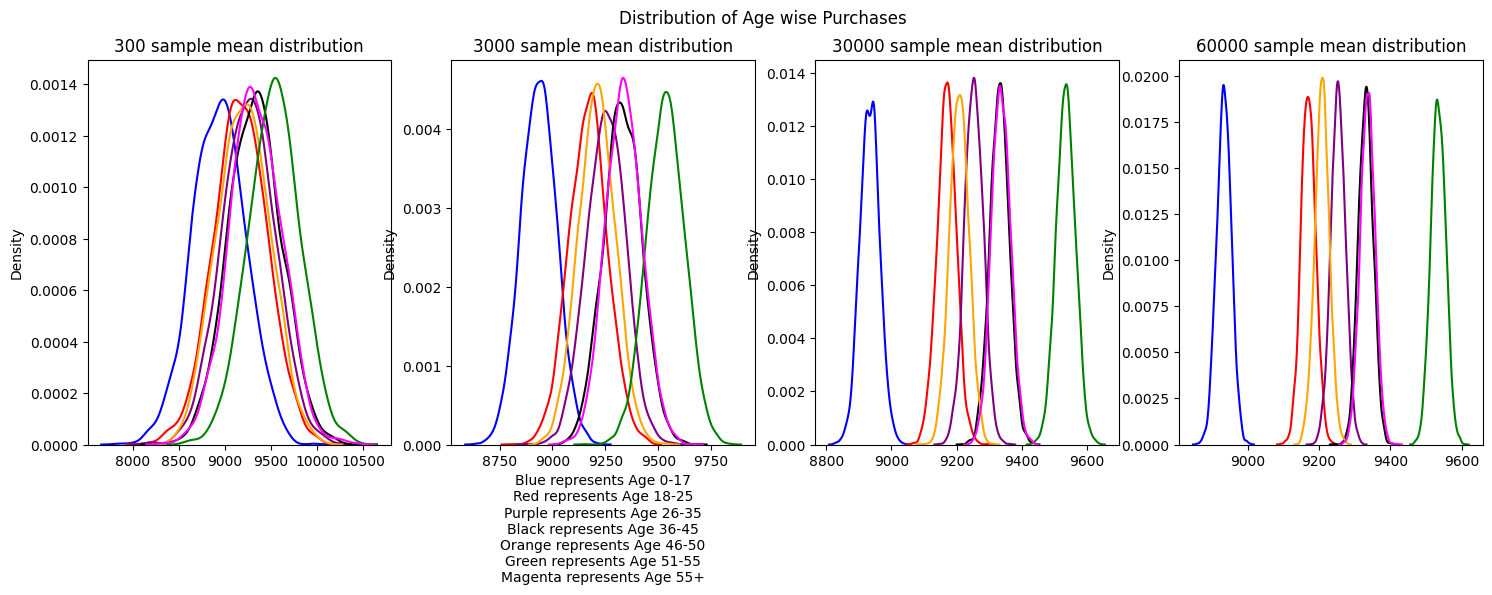

In [ ]:
# Graphical Analysis
plt.figure(figsize=(18,5))
plt.suptitle("Distribution of Age wise Purchases")
plt.subplot(141)
sns.kdeplot(child_samp_dist_samp_mean_300,color='blue')
sns.kdeplot(youth_samp_dist_samp_mean_300,color='red')
sns.kdeplot(youngadult_samp_dist_samp_mean_300,color='purple')
sns.kdeplot(middleadult_samp_dist_samp_mean_300,color='black')
sns.kdeplot(matureadult_samp_dist_samp_mean_300,color='orange')
sns.kdeplot(oldadult_samp_dist_samp_mean_300,color='green')
sns.kdeplot(old_samp_dist_samp_mean_300,color='magenta')
plt.title("300 sample mean distribution")

plt.subplot(142)
sns.kdeplot(child_samp_dist_samp_mean_3000,color='blue')
sns.kdeplot(youth_samp_dist_samp_mean_3000,color='red')
sns.kdeplot(youngadult_samp_dist_samp_mean_3000,color='purple')
sns.kdeplot(middleadult_samp_dist_samp_mean_3000,color='black')
sns.kdeplot(matureadult_samp_dist_samp_mean_3000,color='orange')
sns.kdeplot(oldadult_samp_dist_samp_mean_3000,color='green')
sns.kdeplot(old_samp_dist_samp_mean_3000,color='magenta')
plt.title("3000 sample mean distribution")
plt.xlabel("Blue represents Age 0-17\nRed represents Age 18-25\nPurple represents Age 26-35\nBlack represents Age 36-45\nOrange represents Age 46-50\nGreen represents Age 51-55\nMagenta represents Age 55+")


plt.subplot(143)
sns.kdeplot(child_samp_dist_samp_mean_30000,color='blue')
sns.kdeplot(youth_samp_dist_samp_mean_30000,color='red')
sns.kdeplot(youngadult_samp_dist_samp_mean_30000,color='purple')
sns.kdeplot(middleadult_samp_dist_samp_mean_30000,color='black')
sns.kdeplot(matureadult_samp_dist_samp_mean_30000,color='orange')
sns.kdeplot(oldadult_samp_dist_samp_mean_30000,color='green')
sns.kdeplot(old_samp_dist_samp_mean_30000,color='magenta')
plt.title("30000 sample mean distribution")

plt.subplot(144)
sns.kdeplot(child_samp_dist_samp_mean_60000,color='blue')
sns.kdeplot(youth_samp_dist_samp_mean_60000,color='red')
sns.kdeplot(youngadult_samp_dist_samp_mean_60000,color='purple')
sns.kdeplot(middleadult_samp_dist_samp_mean_60000,color='black')
sns.kdeplot(matureadult_samp_dist_samp_mean_60000,color='orange')
sns.kdeplot(oldadult_samp_dist_samp_mean_60000,color='green')
sns.kdeplot(old_samp_dist_samp_mean_60000,color='magenta')
plt.title("60000 sample mean distribution")

plt.show()

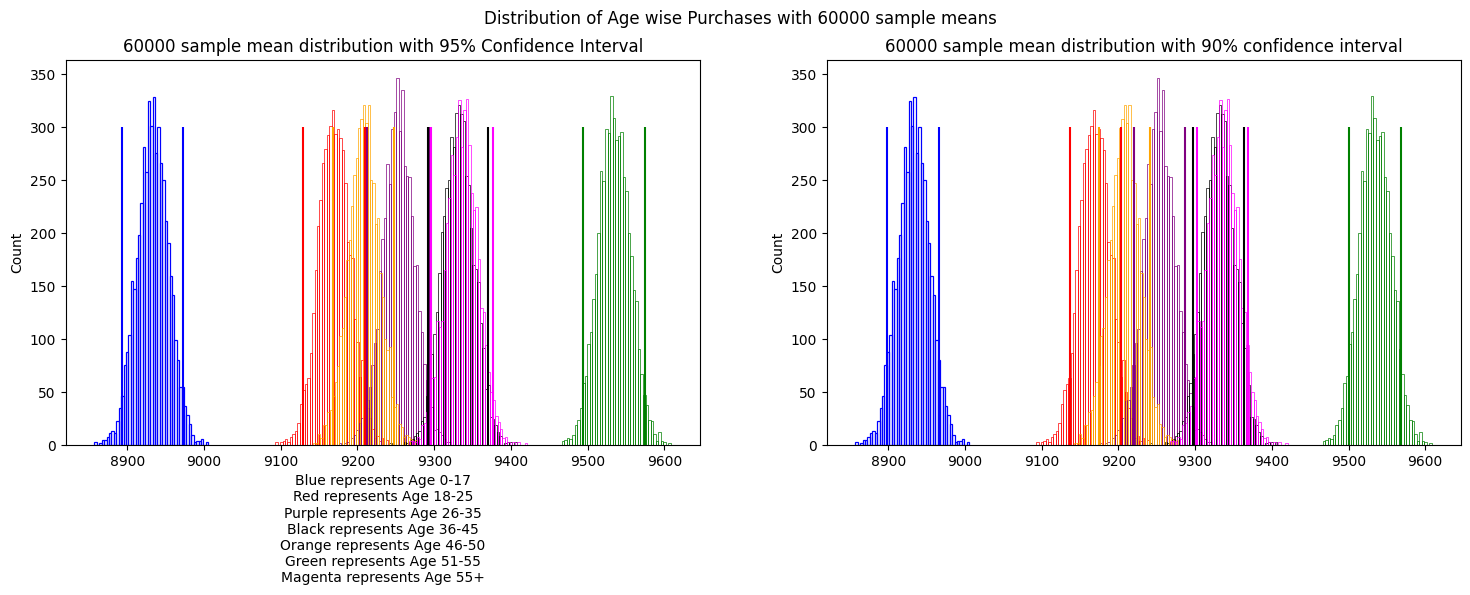

In [ ]:
# Graphical Analysis wit confidence intervals
plt.figure(figsize=(18,5))
plt.suptitle("Distribution of Age wise Purchases with 60000 sample means")

plt.subplot(121)
sns.histplot(child_samp_dist_samp_mean_60000,color='blue',fill=False)
sns.histplot(youth_samp_dist_samp_mean_60000,color='red',fill=False)
sns.histplot(youngadult_samp_dist_samp_mean_60000,color='purple',fill=False)
sns.histplot(middleadult_samp_dist_samp_mean_60000,color='black',fill=False)
sns.histplot(matureadult_samp_dist_samp_mean_60000,color='orange',fill=False)
sns.histplot(oldadult_samp_dist_samp_mean_60000,color='green',fill=False)
sns.histplot(old_samp_dist_samp_mean_60000,color='magenta',fill=False)
plt.vlines(np.percentile(child_samp_dist_samp_mean_60000,2.5),colors='blue',ymin=0,ymax=300)
plt.vlines(np.percentile(child_samp_dist_samp_mean_60000,97.5),colors='blue',ymin=0,ymax=300)
plt.vlines(np.percentile(youth_samp_dist_samp_mean_60000,2.5),colors='red',ymin=0,ymax=300)
plt.vlines(np.percentile(youth_samp_dist_samp_mean_60000,97.5),colors='red',ymin=0,ymax=300)
plt.vlines(np.percentile(youngadult_samp_dist_samp_mean_60000,2.5),colors='purple',ymin=0,ymax=300)
plt.vlines(np.percentile(youngadult_samp_dist_samp_mean_60000,97.5),colors='purple',ymin=0,ymax=300)
plt.vlines(np.percentile(middleadult_samp_dist_samp_mean_60000,2.5),colors='black',ymin=0,ymax=300)
plt.vlines(np.percentile(middleadult_samp_dist_samp_mean_60000,97.5),colors='black',ymin=0,ymax=300)
plt.vlines(np.percentile(matureadult_samp_dist_samp_mean_60000,2.5),colors='orange',ymin=0,ymax=300)
plt.vlines(np.percentile(matureadult_samp_dist_samp_mean_60000,97.5),colors='orange',ymin=0,ymax=300)
plt.vlines(np.percentile(oldadult_samp_dist_samp_mean_60000,2.5),colors='green',ymin=0,ymax=300)
plt.vlines(np.percentile(oldadult_samp_dist_samp_mean_60000,97.5),colors='green',ymin=0,ymax=300)
plt.vlines(np.percentile(old_samp_dist_samp_mean_60000,2.5),colors='magenta',ymin=0,ymax=300)
plt.vlines(np.percentile(old_samp_dist_samp_mean_60000,97.5),colors='magenta',ymin=0,ymax=300)
plt.title("60000 sample mean distribution with 95% Confidence Interval")
plt.xlabel("Blue represents Age 0-17\nRed represents Age 18-25\nPurple represents Age 26-35\nBlack represents Age 36-45\nOrange represents Age 46-50\nGreen represents Age 51-55\nMagenta represents Age 55+")


plt.subplot(122)
sns.histplot(child_samp_dist_samp_mean_60000,color='blue',fill=False)
sns.histplot(youth_samp_dist_samp_mean_60000,color='red',fill=False)
sns.histplot(youngadult_samp_dist_samp_mean_60000,color='purple',fill=False)
sns.histplot(middleadult_samp_dist_samp_mean_60000,color='black',fill=False)
sns.histplot(matureadult_samp_dist_samp_mean_60000,color='orange',fill=False)
sns.histplot(oldadult_samp_dist_samp_mean_60000,color='green',fill=False)
sns.histplot(old_samp_dist_samp_mean_60000,color='magenta',fill=False)
plt.vlines(np.percentile(child_samp_dist_samp_mean_60000,5),colors='blue',ymin=0,ymax=300)
plt.vlines(np.percentile(child_samp_dist_samp_mean_60000,95),colors='blue',ymin=0,ymax=300)
plt.vlines(np.percentile(youth_samp_dist_samp_mean_60000,5),colors='red',ymin=0,ymax=300)
plt.vlines(np.percentile(youth_samp_dist_samp_mean_60000,95),colors='red',ymin=0,ymax=300)
plt.vlines(np.percentile(youngadult_samp_dist_samp_mean_60000,5),colors='purple',ymin=0,ymax=300)
plt.vlines(np.percentile(youngadult_samp_dist_samp_mean_60000,95),colors='purple',ymin=0,ymax=300)
plt.vlines(np.percentile(middleadult_samp_dist_samp_mean_60000,5),colors='black',ymin=0,ymax=300)
plt.vlines(np.percentile(middleadult_samp_dist_samp_mean_60000,95),colors='black',ymin=0,ymax=300)
plt.vlines(np.percentile(matureadult_samp_dist_samp_mean_60000,5),colors='orange',ymin=0,ymax=300)
plt.vlines(np.percentile(matureadult_samp_dist_samp_mean_60000,95),colors='orange',ymin=0,ymax=300)
plt.vlines(np.percentile(oldadult_samp_dist_samp_mean_60000,5),colors='green',ymin=0,ymax=300)
plt.vlines(np.percentile(oldadult_samp_dist_samp_mean_60000,95),colors='green',ymin=0,ymax=300)
plt.vlines(np.percentile(old_samp_dist_samp_mean_60000,5),colors='magenta',ymin=0,ymax=300)
plt.vlines(np.percentile(old_samp_dist_samp_mean_60000,95),colors='magenta',ymin=0,ymax=300)
plt.title("60000 sample mean distribution with 90% confidence interval")
plt.show()

- When using the entire dataset,we were not able to conclude the difference in spending behaviour because of the outliers which pulls the mean value of all age groups to be in the same levels causing overlap.
- Hence performed CI with sample size of 300 for 5000 iterations at 95% confidence interval,the results were same, there was overlap in all age groups thus not able to conclude.
- Increased sample size to 3000 for 5000 iterations at 95% CI there was still overlap at 95% confidence Intervalbut it starting decreasing for some age groups, but we are still unable to conclude anything.
- Increased sample size to 30000 for 5000 iterations at 95% CI, resulting in not all age groups have overlap and decreasing the overlap.
- Increased sample size to 60000 for 5000 iterations at 95% CI, resulting in not all age groups have overlap and decreasing the overlap.
- Increased sample size to 30000 for 5000 iterations at 90% CI, resulting in not all age groups have overlap and decreasing the overlap but now we can coclude about some groups behaving differently and some behaving similarly.
- We can say that with 90% CI that the age group 0-17 has less amount mean purchase value, followed by 18-25,26-35,55+/36-45and maximum for 51-55 age group.
- We can say that with 90% CI that the age group 36-45 and 55+ have similar buying habits in term of purchases.
- There is not much variation in the confidence interval range of all age groups which shows similarity of dispersion in all groups.
With the increase in sample size , the shape of distribution bexomes less wider and more peaky and tended towards normality.
- The overlap between many groups decreased with sample size increase while for some it remained the same, showing th esimilarity and sifferences in their purchasing patterns .

# *Report*
- Though the analysis has been written earlier lets conclude them in precise manner.
- On 95% Confidence Interval, we can conclude that males average purchases are more than the females. So, We should focus more on female category with more inclusion of female products in store, by doing proper marketing and special offers for females etc.
- For Marital status, there is no significant statistical difference in average purchases of married and unmarried. So, there is not any need to differentiate customers based on their marital status for marketing and targeting sales.
- For Age group, there is little significant difference for some age groups in average purchases at 90% Confidence interval. Age group(50-55) spends the most followed by 55+/(36-45),26-55, 18-25 and age group (0-17) the least. The average purchases by 36-45 and 55+ have similar spending habits with some overlap between many groups. So we can include kids product more to increase their purchases but kids spending limits are limited so to be focus more on 18-25 age group products and improving more for 51-55 products as these customers goes for high amount products.
- Almost 1/4th customers exhibit a preference for purchasing items within product category 5. On the other hand, product category 9 experiences the least popularity, with only a minimal 0.07% of customers expressing a preference for it.
-The majority of customers fall under Occupation category 4.
- Walmart customers are distributed across different city categories: 42.03% belong to category B, 31.12% belong to category C, and the remaining 27% belong to category A.
- The majority of customers are those who are their in a city for a duration of one year.
- Customers residing in a 'C' city category demonstrate higher spending per transaction compared to customers in other city categories.
- Female customers predominantly favor product category 5 for their purchases, while male customers show a preference for product category 1 in their shopping choices.
- Both unmarried and married customers at Walmart exhibit a shared preference for product category 5 when making their shopping choices.


# *RECOMMENDATIONS*

- Need to work on product Categories 3,4,12,13,15,16, 19 and 20 to see why people are not repeating sale  for these categories much as number of sales are less as compared to new customers for these product categories.
- product category 9 and 17 are sold very less but they account for 64 and 59 million amount sales so they are high cost products.
- There are 144 products which are sold only once and 87 products which are sold only twice, these kind of products increases the stock and blocks money so they should be removed from our stores.
- product category 19 and 20 are attracting have less amount purchase too need to review them more and take necessary actions.
- To make sure the store provides a wide variety of products that align with the preferences and requirements of female customers. This might encompass a diverse range, spanning from clothing and beauty products and much more.
- To take feedback from female customers to understand their preferences, requirements and suggestions to make available the products required by them.
- Can give special discount to female customers, featuring exclusive perks like discounts ,early access to sales, and beauty shows etc. This may enhance engagement and attract female shoppers.
- As female spending limit is less than males products should be made avilable as per their average purchases.
- Though males accounts for 75% sales, they should be taken care of to get them engaged with more shopping attractions.
- Collaborate with brands or influencers that relate with female customers. This can help expand reach and attract new female customers too.
- Hence walmart must focus on women products to improve the avg spending either through offers,discounts or marketing.
- Offer educational toys, craft kits, and learning materials that promote creativity and skill development among childrenand increase purchases for age group 0-17 but as their spending average is less, these products should not be expensive but below 9000.
- Recognizing that customers in the 51 - 55 age group have the highest spending per transaction,should explore opportunities to enhance the shopping experience
for this group. This can be done by offering premium services, personalized recommendations, or loyalty programs that cater to the preferences and spending habits of this age group.
- Dofferent sections should be created according to different age groups as theri spending behaviour differs to enhance shopping experience.
